In [499]:
import numpy as np
import matplotlib.pyplot as plt
import Modules.SQcircuit_extensions as sq_ext
import Modules.Fits as fits
from scipy.optimize import minimize
import qutip as qt
import os
import importlib
import pickle

importlib.reload(sq_ext)
importlib.reload(fits)

data_dir = r'/data'
opt_dir = r'/opt_results_low_energy/'

In [500]:
GHz     =   1e9
fF      =   1e-15
nH      =   1e-9

# Single circuit

## Qubit 1 [ Cooldown 1 ]

In [187]:
experiment_name = 'qubit_1_single_1'
load = False
# method = 'SLSQP'
method = 'Nelder-Mead'
# method = 'L-BF GS-B'
# method = 'TNC'
# method = 'Powell'
# method = 'COBYLA'


### Load spectral data and theoretical model

In [188]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:15]
ω_exp = ω_exp[:15]
I_exp = I_exp[:15]

### Guess parameters and set bounds

In [189]:
ω_q = 3.92 * GHz
μ = 17.45 * GHz
I0_guess = I0
I_origin_guess = Iss - I0/2

ω_q = 3.9278e+09
μ = 1.6922e+10
I0_guess = 3.0961e-03
I_origin_guess = -1.9026e-03

parameters_guess = [I0_guess, I_origin_guess, ω_q, μ]

parameter_names = ['I0_q1', 'I_origin_q1', 'ω_q1', 'μ_q1']
flexible_param_indices = [2, 3]
bounds = fits.create_bounds(parameters_guess, flexible_param_indices)
data_set = ([I_exp, ω_exp])

model_1 = [parameter_names, parameters_guess, theoretical_spectrum, data_set, flexible_param_indices] 

### Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

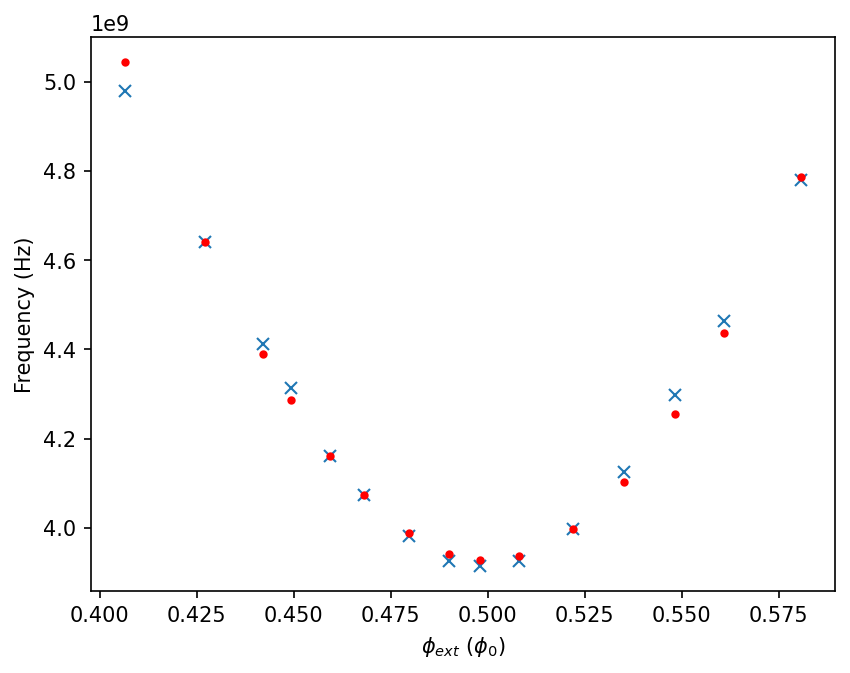

In [190]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_guess, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


### Optimize or load previous optimization

In [544]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method, tol=1e-13).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.01749341123802471
0.2670290383168316
0.32437220955823765
0.1806564314519631
0.03213441616428613
0.5608923008393611
0.1269621070400905
0.37671527512145464
0.13253199040520142
0.15037180453827714
0.07044603601070897
0.1943922672894137
0.053486152768447114
0.16903988425282918
0.055710898379964256
0.08515704714284521
0.0373233762326608
0.09390906496191899
0.024984596708182462
0.053823957591951396
0.027740090665730157
0.04570080206254041
0.02352624704520178
0.03404571920384095
0.020782441514763262
0.029570010109827613
0.020111482401855216
0.03568159548686368
0.019015222826629322
0.02316047988740956
0.020493020581206545
0.019665655337937703
0.02142830267024555
0.018440531096004423
0.020276204056403988
0.017961057782323965
0.018859270569757176
0.022684152287824853
0.017551011924231086
0.019980682666678302
0.018202661770077132
0.017867275271163528
0.01842090911662887
0.01785031664888439
0.01768475622103052
0.01763087916330455
0.01830083816725464
0.017688432761429247
0.017931748461840882
0.01

In [545]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0_q1 = 3.0961e-03
I_origin_q1 = -1.9026e-03
ω_q1 = 3.9278e+09
μ_q1 = 1.6922e+10


Optimized parameters 

I0_q1 = 3.1155e-03
I_origin_q1 = -1.9137e-03
ω_q1 = 3.9236e+09
μ_q1 = 1.7177e+10


### Plot fits and errors

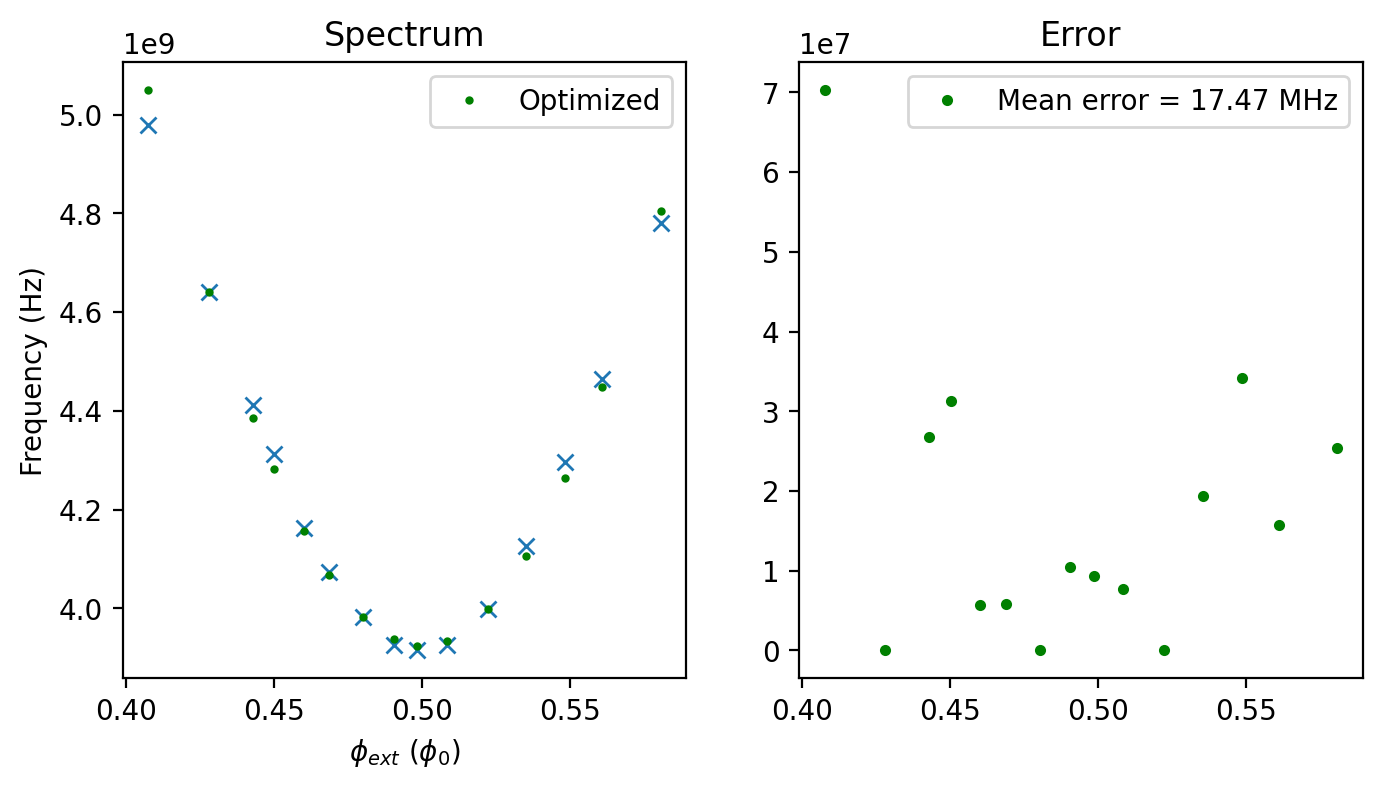

In [546]:
φ_ext_opt, ω_opt   = theoretical_spectrum(parameters_opt, data_set,  out = 'spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_opt  , ω_exp     , 'x')
ax1.plot(φ_ext_opt  , ω_opt     , 'g.', markersize=4, label='Optimized')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax1.set_title('Spectrum')
ax1.legend()
ax2.set_title('Error')

ax2.plot(φ_ext_opt, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

## Resonator 1 [ Cooldown 1 ]

In [547]:
experiment_name = 'resonator_1_single_1'
load = False

### Load spectral data and theoretical model

In [548]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [549]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

### Guess parameters and set bounds

In [551]:
I0_guess = I0
I_origin_guess = Iss - I0/2

I0_guess = 2.9466e-03
I_origin_guess = -1.8283e-03
ω_r = 6.6132e+09
g_Φ = 1.0818e+08
ω_q = 5.9241e+09
μ = 7.2222e+09

I0_guess, I_origin_guess, ω_r, g_Φ, ω_q, μ = np.load(os.getcwd() + opt_dir +  experiment_name + '.npz')['parameters_opt']


crossing_index_1  = 11
crossing_index_2  = 10
extra_important_indices = []
important_multiplier = 1

parameter_names = ['I0_r1', 'I_origin_r1', 'ω_r1', 'g_Φ_q1r1', 'ω_q1', 'μ_q1' ]
parameters_guess = [I0_guess, I_origin_guess, ω_r, g_Φ, ω_q, μ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
flexible_param_indices = [2,3,4,5]
bounds = fits.create_bounds(parameters_guess)

model_2 = [parameter_names, parameters_guess, theoretical_spectrum, data_set, flexible_param_indices] 

In [552]:
models = [model_1,model_2]

### Plot guess to check

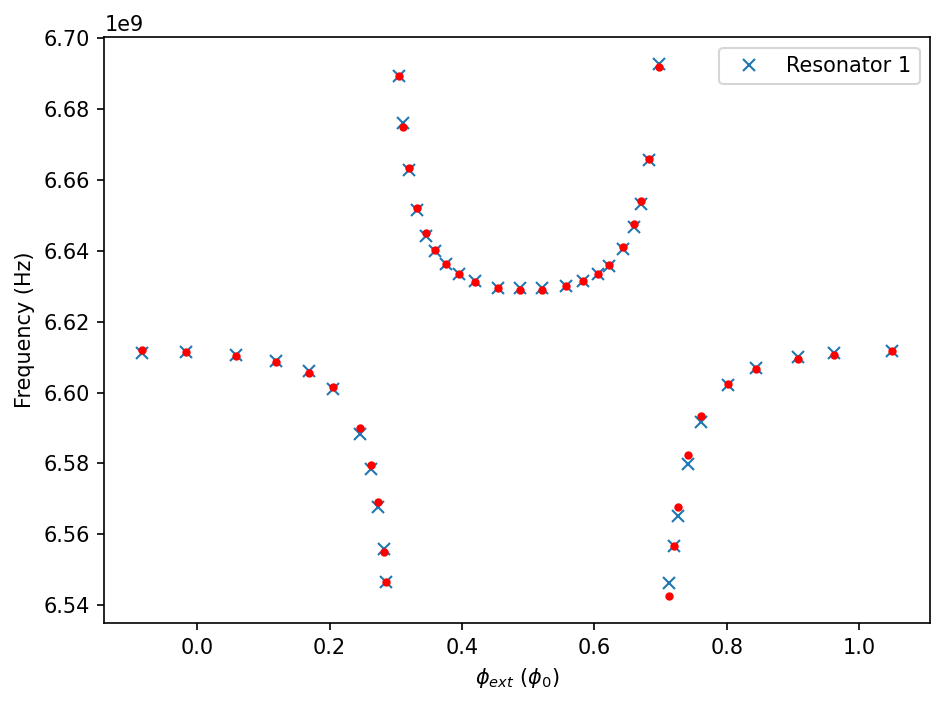

In [110]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')
ax.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

### Optimize or load previous optimization

In [103]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.028615053020581246
0.7639335195647841
0.963641636074831
11.950198599645192
0.09688662259784221
1.6902810293332728
0.274289343418128
10.641123104828106
5.588676371306744
6.274258777675042
2.771791460109339
3.261597676628958
1.317406148922184
1.7718557027353983
0.6524310319941664
1.500882629615797
0.6344320060406189
1.5086744207392178
0.39263094763907624
1.2103314509207554
0.33888574998307514
0.6271180199480696
0.5458261801722804
0.8851230535153789
0.2553093932373562
0.5647358949590444
0.26649674394028666
0.5551268338753901
0.16480551348172187
0.44398483183327675
0.14564474371527864
0.3757153109691801
0.13598836367380046
0.2738482723831224
0.140930712236207
0.3512413414102049
0.10812432747018529
0.23106291779739
0.07339858830992221
0.19984914215418054
0.06764191676974392
0.10795034837594222
0.1905209806124525
0.06416745465120792
0.14539737672651387
0.0553100140705986
0.13671159049052714
0.06142766109499455
0.08467206903582573
0.04778171067901516
0.10456495293519115
0.042154969736818315

In [104]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0_guess_r1 = 2.9466e-03
I_origin_guess_r1 = -1.8283e-03
ω_r1 = 6.6132e+09
g_Φ_q1r1 = 1.0818e+08
ω_q1 = 5.9241e+09
μ_q1 = 7.2222e+09


Optimized parameters 

I0_guess_r1 = 2.9477e-03
I_origin_guess_r1 = -1.8289e-03
ω_r1 = 6.6132e+09
g_Φ_q1r1 = 1.0819e+08
ω_q1 = 5.9239e+09
μ_q1 = 7.2259e+09


### Plot fits and errors

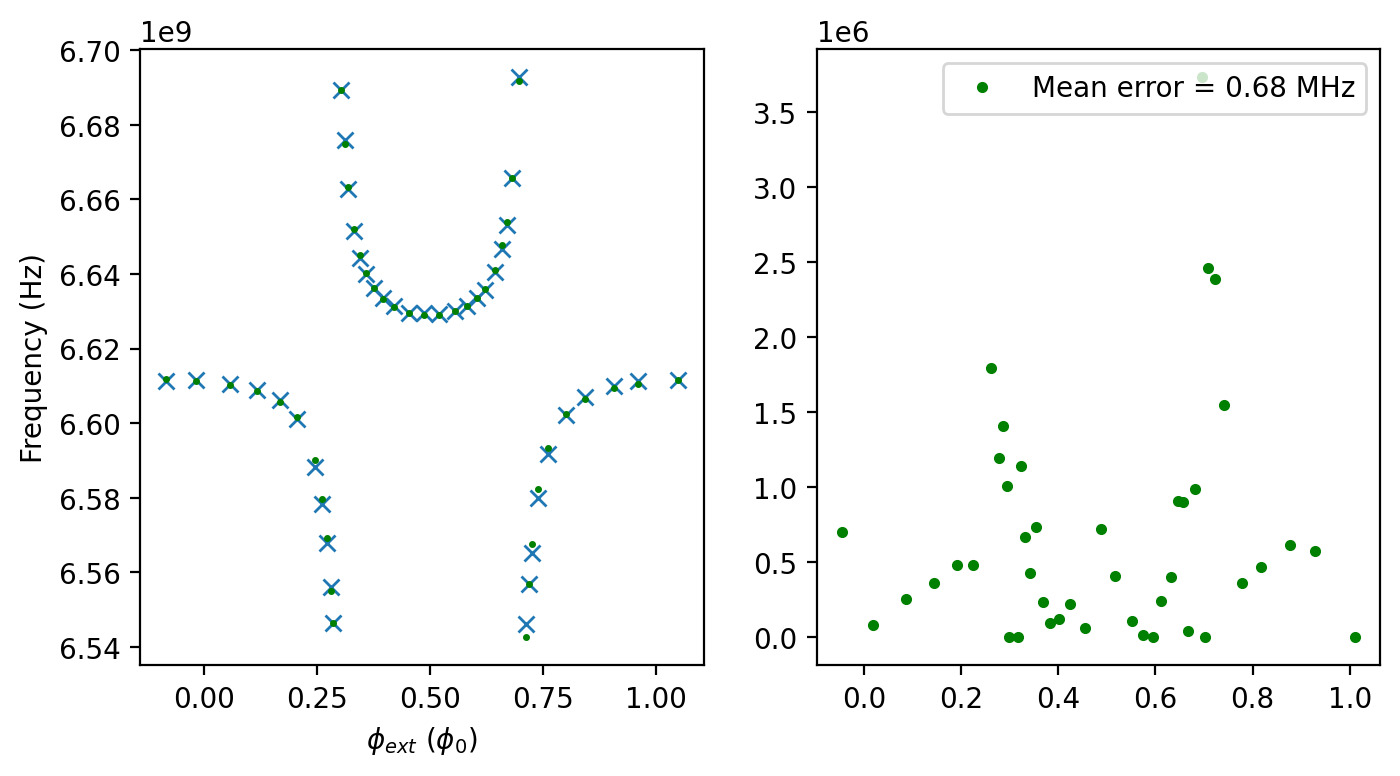

In [105]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_opt  , ω_exp, marker='x', ls='', label='Resonator 1')
# ax1.plot(φ_ext_guess, ω_guess, '.r', markersize=3)
ax1.plot(φ_ext_opt  , ω_opt, 'g.', markersize=3)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

# ax2.plot(φ_ext_exp, np.abs(ω_guess - ω_exp), 'r.', label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_exp, np.abs(ω_opt   - ω_exp), 'g.', label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

 ## Qubit 1 and Resonator 1 [Cooldown 1]

In [568]:
experiment_name = 'resonator_and_qubit_1_single_1'

In [569]:
I0_F = 3.0961e-03
I_origin_F = -1.9026e-03
ω_q = 3.9278e+09
μ = 1.6922e+10
I0_R = 3.8209e-03
I_origin_R = -2.2667e-03
ω_r = 6.6120e+09
g_Φ = 2.6024e+08

In [570]:
models[0][1] = [I0_F, I_origin_F, ω_q, μ]
models[1][1] = [I0_R, I_origin_R, ω_r, g_Φ, ω_q, μ]

In [571]:
parameters_opt_list, models = fits.fit_multiple_models(models, method='Nelder-Mead')

0.01749341123802471
0.0034510564578289988
0.2670290383168316
0.0034510564578289988
0.32437220955823765
0.0034510564578289988
0.1806564314519631
0.007969811938447157
0.03213441616428613
0.0116689842314984
0.01749341123802471
0.061768552195806736
0.01749341123802471
0.07727472220625062
0.01749341123802471
0.31079684590213996
0.01749341123802471
0.0042042797646235286
0.04136478184735807
0.3052834199913623
0.02003128943752842
0.1577289526490165
0.4600756765963481
0.04182964373338304
0.14328981016038728
0.01154338688996794
0.3310181596524615
0.04438870102486016
0.1344946420555263
0.012129916839447022
0.17084092345817636
0.04035950576418461
0.09232657634181995
0.015313978624842644
0.02414868115486428
0.14654984057214207
0.022970048165776125
0.07084947248731134
0.206523543499445
0.022079903764859472
0.06219957014337813
0.004509327375496569
0.142197282920694
0.024807413497724733
0.07102629465578553
0.00435394803793503
0.07926908743515353
0.030264462615899424
0.04982936770969766
0.0048333295500

In [556]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt  = model[1]
    print('Optimized parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Optimized parameters 

I0_q1 = 2.7565e-03
I_origin_q1 = -1.7355e-03
ω_q1 = 3.9335e+09
μ_q1 = 1.5201e+10
Optimized parameters 

I0_r1 = 3.2719e-03
I_origin_r1 = -1.9858e-03
ω_r1 = 6.6106e+09
g_Φ_q1r1 = 2.6058e+08
ω_q1 = 3.9335e+09
μ_q1 = 1.5201e+10


### Plot guess to check

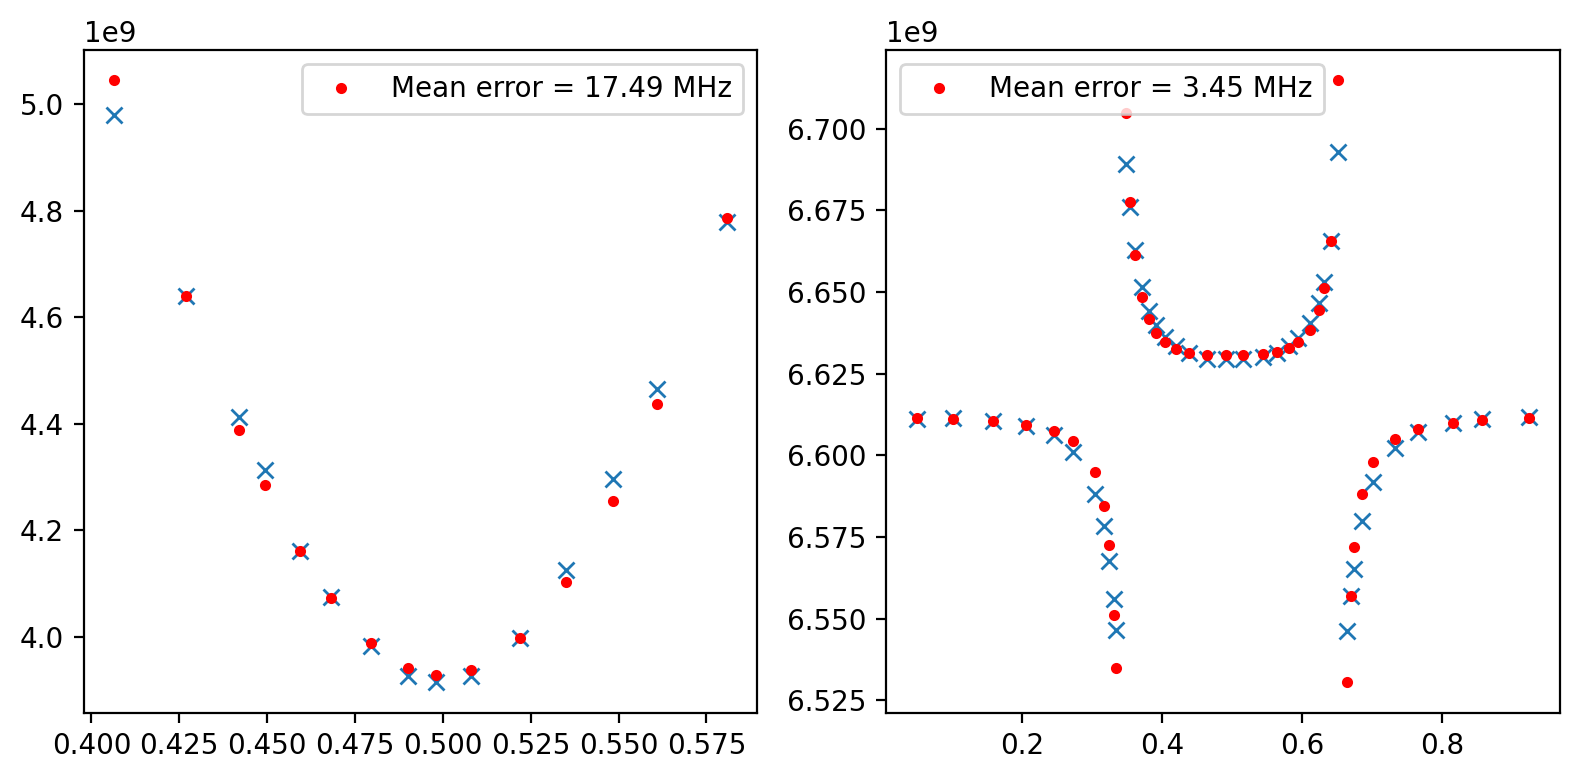

In [572]:
φ_ext_and_ω_list, ω_exp_list = fits.return_spectra_multiple_models(models)
fig, axs = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for i, (ax, (φ_ext_opt, ω_opt), ω_exp) in enumerate(zip(axs, φ_ext_and_ω_list, ω_exp_list )):
    ax.plot(φ_ext_opt, ω_exp, 'x')
    ax.plot(φ_ext_opt, ω_opt, '.r', label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz' )
    ax.legend()
# ax2.set_ylim([6.35e9,6.65e9])
fig.tight_layout()


### Load spectral data and theoretical model

In [560]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_1_single_1')

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp_F   = φ_ext_exp_F[:15]
ω_exp_F       = ω_exp_F[:15]
I_exp_F       = I_exp_F[:15]

In [561]:
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_1_single_1')

In [562]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

### Guess parameters and set bounds

In [563]:
I0_F, I_origin_F, ω_q, μ = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
I0_R, I_origin_R, ω_r, g_Φ, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']

I0_F = 3.0961e-03
I_origin_F = -1.9026e-03
ω_q = 3.9278e+09
μ = 1.6922e+10
I0_R = 3.8209e-03
I_origin_R = -2.2667e-03
ω_r = 6.6120e+09
g_Φ = 2.6024e+08

crossing_index_1_R = 11
crossing_index_2_R = 10
extra_important_indices = []
important_multiplier = 1

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_R, crossing_index_2_R, extra_important_indices, important_multiplier])
parameters_guess = [I0_F, I_origin_F, ω_q, μ, I0_R, I_origin_R, ω_r, g_Φ]

parameter_names = ['I0_F', 'I_origin_F', 'ω_q', 'μ', 'I0_R', 'I_origin_R', 'ω_r', 'g_Φ']

bounds = fits.create_bounds(parameters_guess, flexible_param_indices=[2,3,6,7])

### Plot guess to check

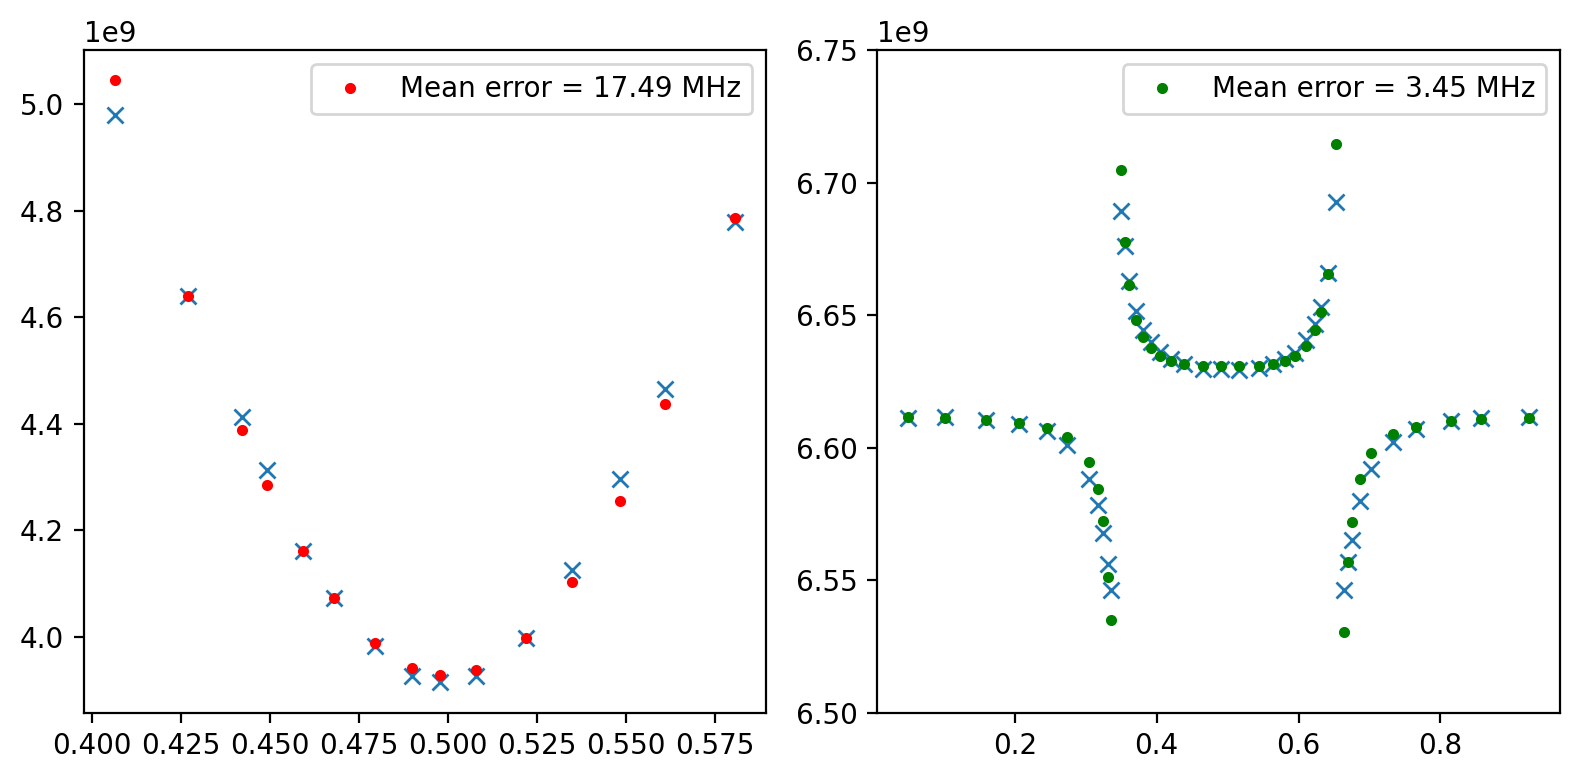

In [567]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
ax1.plot(φ_ext_F_guess, ω_exp_F, 'x')
ax1.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax1.legend()

ax2.plot(φ_ext_R_guess, ω_exp_R, 'x')
ax2.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.g', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz' )
ax2.legend()
ax2.set_ylim([6.5e9,6.75e9])
fig.tight_layout()

### Optimize or load previous optimization

In [54]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.26234482206826354
0.1449733135266838
0.40731813559494734
4.004318377522983
0.1449733135266838
4.149291691049667
4.864363711987421
0.1449733135266838
5.009337025514105
2.710342463112902
0.3341251669392052
3.0444676300521074
0.48215352816422796
0.4894130704647369
0.9715665986289649
0.26234482206826354
2.593826052521905
2.8561708745901684
0.26234482206826354
3.244734228801959
3.5070790508702223
0.26234482206826354
13.052352050819406
13.31469687288767
0.26234482206826354
0.1764515560134907
0.4387963780817542
0.6208360440488563
12.82279102646072
13.443627070509576
0.30068970957355834
6.623890504763736
6.924580214337294
0.4841818418890214
6.450843088027977
6.935024929916998
0.3211317529267192
3.353441001777299
3.674572754704018
6.899078663923506
0.9367052572913904
7.8357839212148965
2.151093176671525
0.2981128289938898
2.4492060056654146
4.976319591933699
0.9931050497487831
5.969424641682481
2.016865873374426
0.31049634829036044
2.327362221664786
0.5661132251488328
3.0852649220926915
3.651

In [55]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0_F = 3.0957e-03
I_origin_F = -1.9024e-03
ω_q = 3.9279e+09
μ = 1.6918e+10
I0_R = 3.8203e-03
I_origin_R = -2.2664e-03
ω_r = 6.6120e+09
g_Φ = 2.6023e+08


Optimized parameters 

I0_F = 3.0961e-03
I_origin_F = -1.9026e-03
ω_q = 3.9278e+09
μ = 1.6922e+10
I0_R = 3.8209e-03
I_origin_R = -2.2667e-03
ω_r = 6.6120e+09
g_Φ = 2.6024e+08


### Plot fits and errors

(6550000000.0, 6650000000.0)

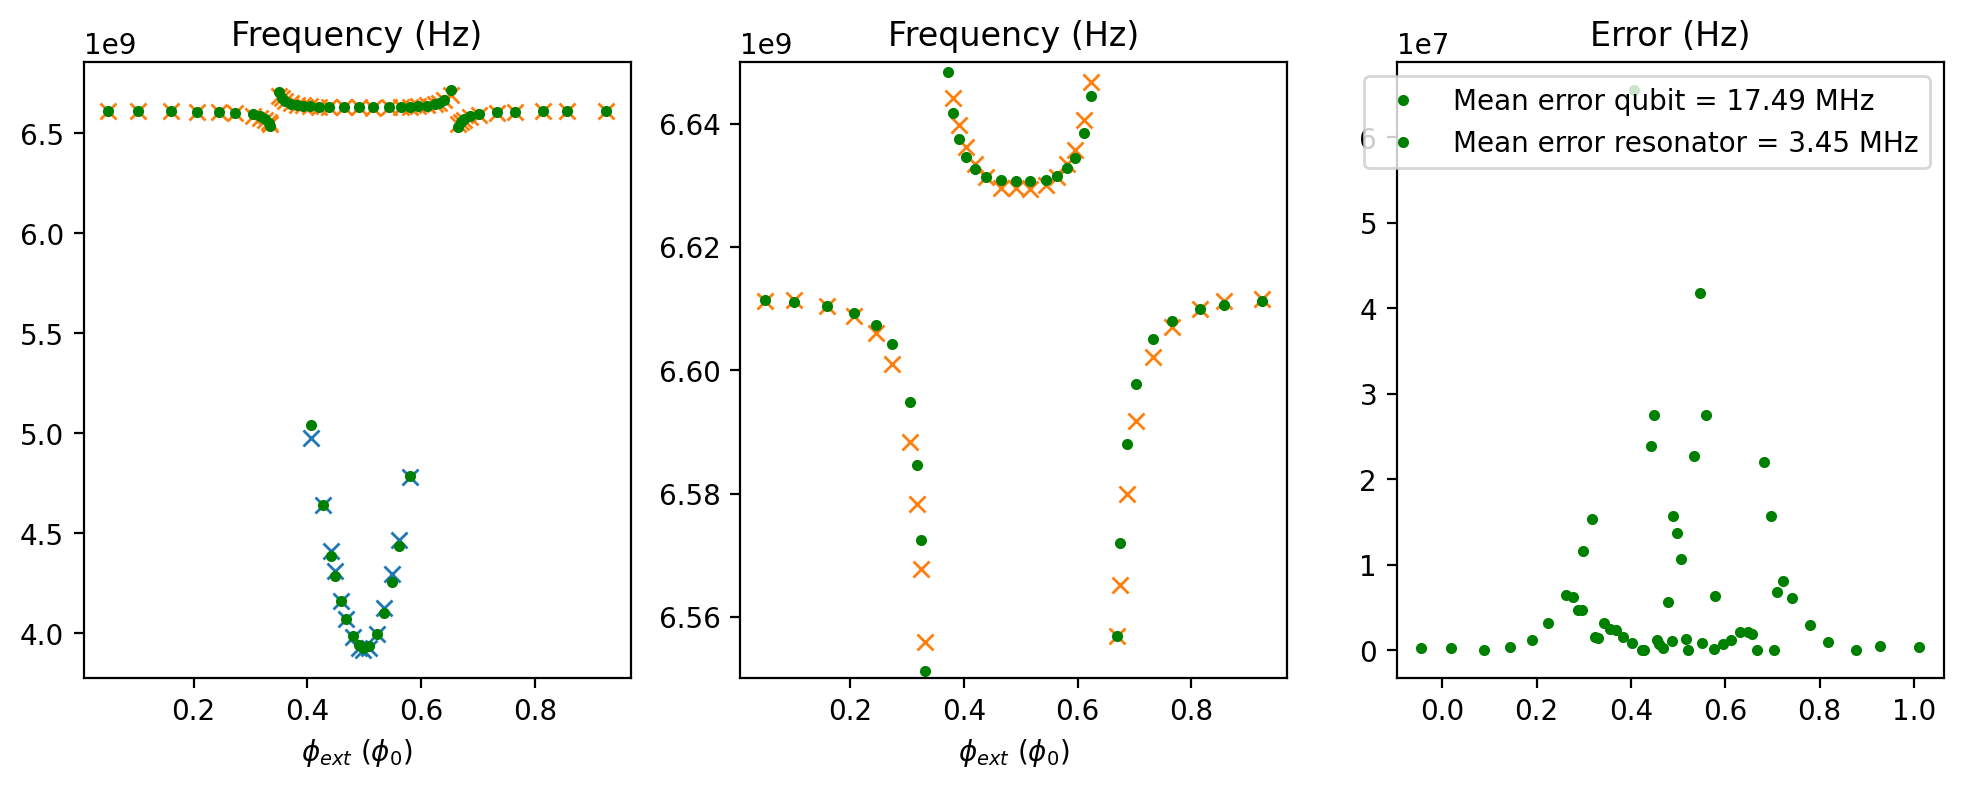

In [63]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_F_opt     , ω_exp_F   , 'x')
    ax.plot(φ_ext_R_opt     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.' , label = f'Mean error qubit = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.' , label = f'Mean error resonator = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3. legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.55e9,6.65e9])


## Qubit 1 and Resonator 1 [Cooldown 2]

In [295]:
experiment_name = 'resonator_and_qubit_1_single_2'


### Load spectral data and theoretical model

In [296]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [297]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [298]:
CF_1, LF_1, EJ_1, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

I0_F_1 = I0_F
I_origin_F_1 = Iss_F - I0_F/2

I0_R_1 = I0_R
I_origin_R_1 = Iss_R - I0_R/2

crossing_index_1_F = 30
crossing_index_1_R = 10
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = fits.create_bounds(parameters_guess)

### Plot guess to check

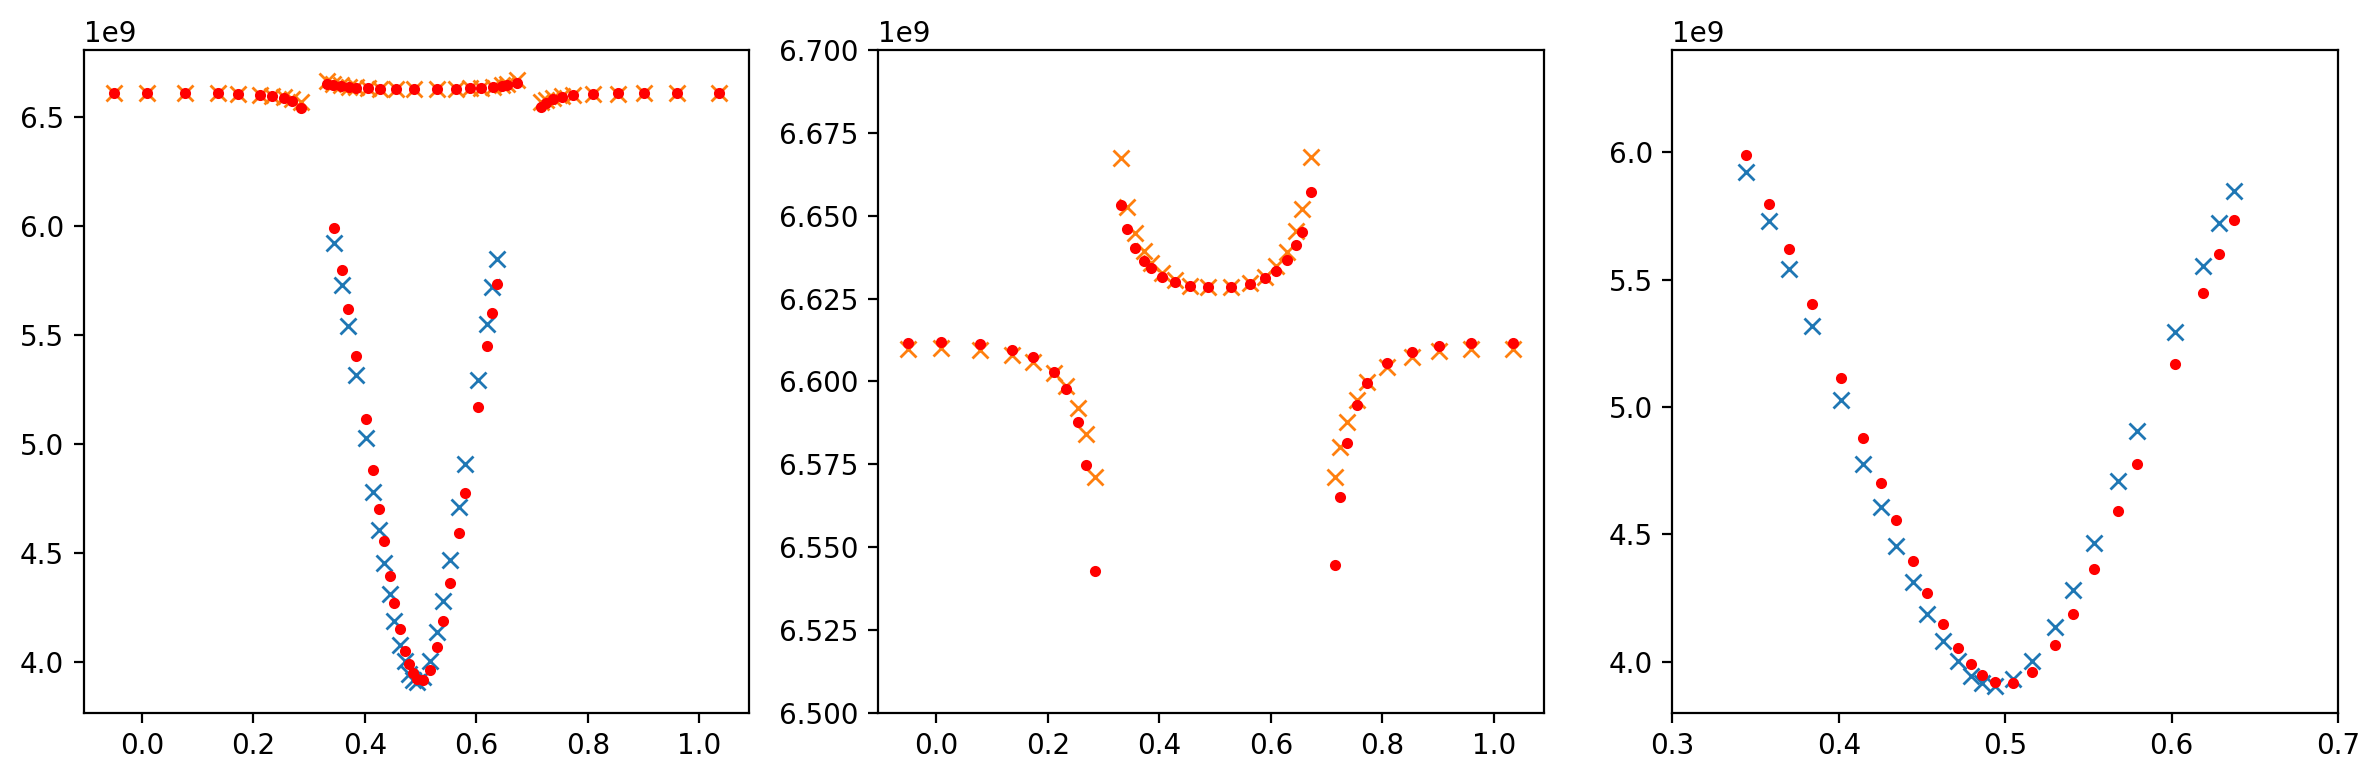

In [299]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[12,4], dpi=200)
for ax in (ax1, ax2, ax3):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
ax3.set_ylim([3.8e9, 6.4e9])
ax3.set_xlim([0.3,0.7])
#ax.set_ylabel(r'$')
#ax.set_xlabel(r'$')
#ax.set_title(r'$')
fig.tight_layout()

### Optimize or load previous optimization

In [300]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

2.270262216789377
2.2702622145833407
2.270262213547341
2.2702622065216205
2.270772059457286
2.271307742439048
2.2702622601241242
2.270262219282409
2.270262215530952
2.2702743468749045
2.270266571936125
72.88738795486253
72.88738793886708
72.88738795180709
72.8873878795528
72.88691184537151
72.88663998732594
72.88738772535157
72.88738794434755
72.88738794714338
72.88720247995509
72.88714212230326
5.175099674055779
5.175099678641512
5.175099681944944
5.175099706173825
5.174585599089385
5.174072843073023
5.175099470746175
5.175099662652253
5.175099673306864
5.175082495576055
5.1750753667069835
1.6058630934969491
1.6058630902778335
1.6058630908625218
1.6058630956206557
1.6063786603343755
1.6069129755972438
1.6058628960940986
1.6058630822467346
1.6058630910346259
1.6058458629549635
1.6058406960459686
36.10349257969182
36.103492573641745
36.10349257856296
36.10349261844591
36.103073981088514
36.10281226569865
36.10349235901687
36.103492567133735
36.103492574265715
36.10351692405327
36.103538

In [301]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.271
LF_1 = 27.891
EJ_1 = 4.999
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 5.757
LR_1 = 100.346
Δ_1 = 1.047
I0_R_1 = 0.003
I_origin_R_1 = -0.000


Optimized parameters 

CF_1 = 24.271
LF_1 = 27.892
EJ_1 = 5.001
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 5.755
LR_1 = 100.346
Δ_1 = 1.048
I0_R_1 = 0.003
I_origin_R_1 = -0.000


### Plot fits and errors

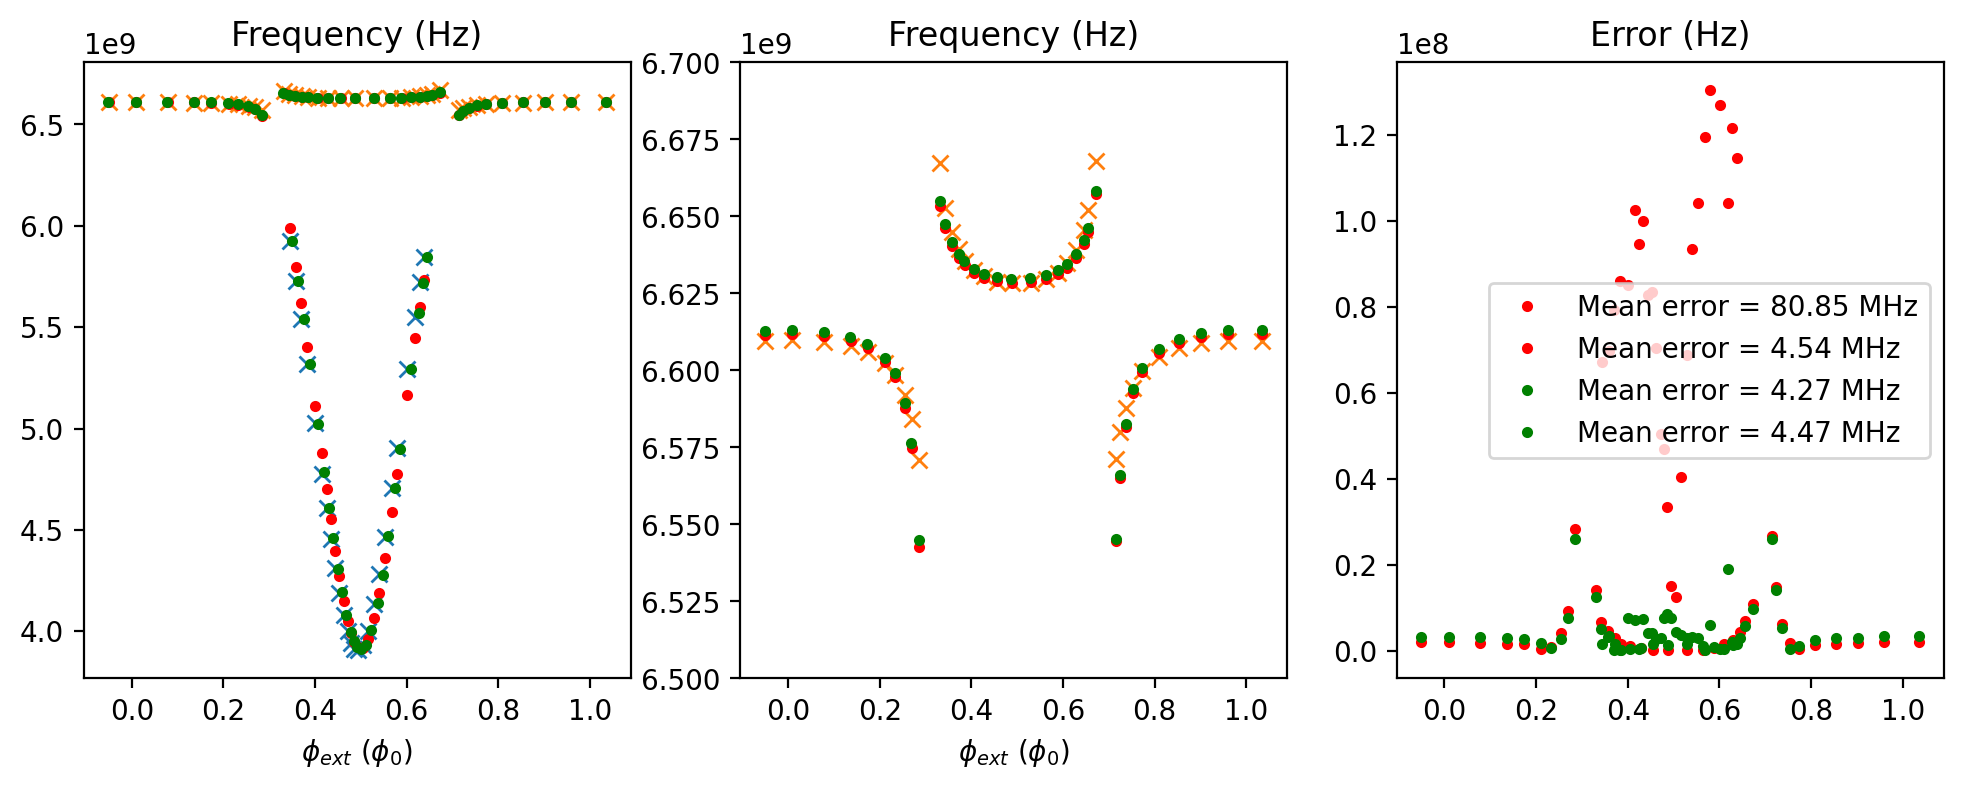

In [302]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.5e9,6.7e9])
ax3.legend()

# Qubit 1

In [622]:
experiment_name = 'qubit_1'
load = True
method = 'Nelder-Mead'


### Load spectral data and theoretical model

In [623]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:22]
ω_exp = ω_exp[:22]
I_exp = I_exp[:22]

## Guess parameters and set bounds

In [624]:
I0_q1, I_origin_q1, ω_q1, μ_q1 = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']

parameters_guess = [I0_q1, I_origin_q1, ω_q1, μ_q1]

parameter_names = ['I0_q1', 'I_origin_q1', 'ω_q1', 'μ_q1']
flexible_param_indices = [2, 3]
bounds = fits.create_bounds(parameters_guess, flexible_param_indices)
data_set = ([I_exp, ω_exp])

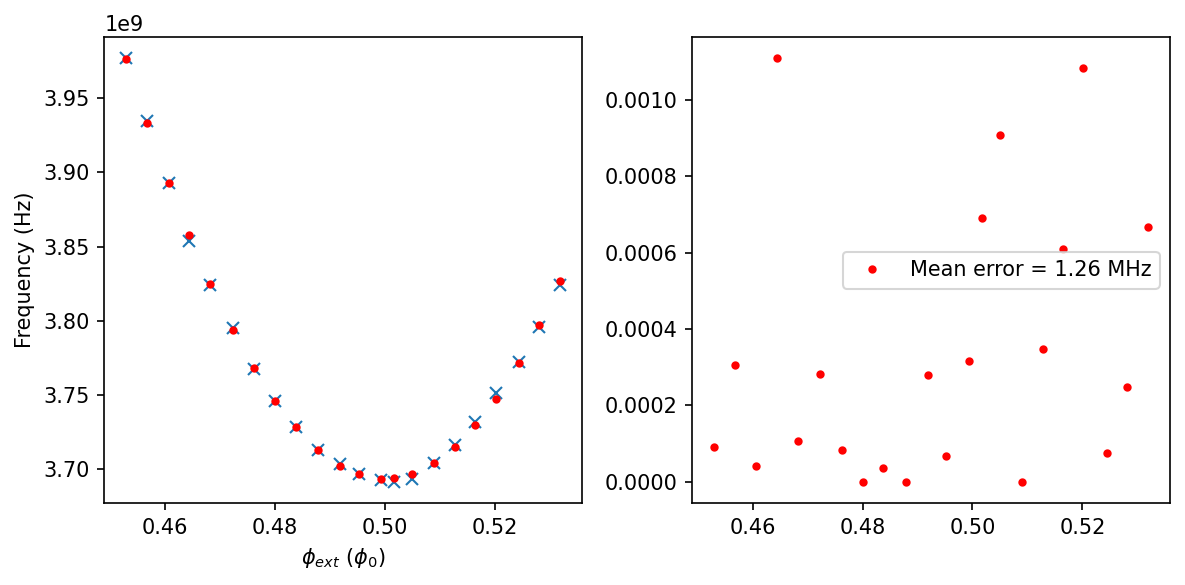

In [625]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax2, ax3) = plt.subplots(dpi=150, ncols=2, figsize=[4*2,4])
ax2.plot(φ_ext_guess, ω_exp, 'x')
ax2.plot(φ_ext_guess, ω_guess, 'r.')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

# ax2.set_ylim([3.5e9,4e9])
# ax2.set_xlim([0.45,0.55])

ax3.plot(φ_ext_guess, np.abs(ω_guess-ω_exp)/ω_exp, 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax3.legend()

fig.tight_layout()

## Optimize or load previous optimization

In [626]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead', tol=1e-13).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [627]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 


TypeError: 'NoneType' object is not iterable

In [628]:
model_q1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 

## Plot fits and errors

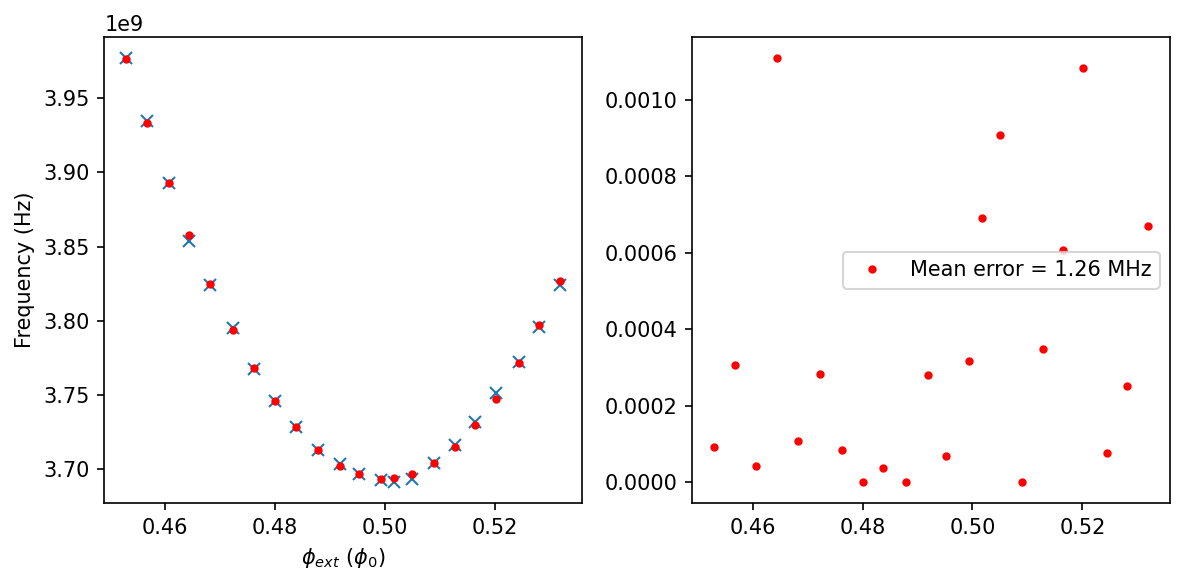

In [198]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')
fig, (ax2, ax3) = plt.subplots(dpi=150, ncols=2, figsize=[4*2,4])
ax2.plot(φ_ext_opt, ω_exp, 'x')
ax2.plot(φ_ext_opt, ω_opt, 'r.')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

# ax2.set_ylim([3.5e9,4e9])
# ax2.set_xlim([0.45,0.55])

ax3.plot(φ_ext_opt, np.abs(ω_opt-ω_exp)/ω_exp, 'r.' , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz' )
ax3.legend()

fig.tight_layout()

# Resonator 1 

In [312]:
experiment_name = 'resonator_1'
method = 'Nelder-Mead'
load = True

### Load spectral data and theoretical model

In [313]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [314]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [315]:

I0_r1,  I_origin_r1, ω_r1, g_q1r1, ω_q1, μ_q1, shift_ω_r1 = np.load(os.getcwd() + opt_dir +  experiment_name + '.npz')['parameters_opt']
# _, _ , ω_q1, μ_q1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']

# shift_ω *= 1.15
# g_q1r1 *= 0.9
# I0_r1 = 3.6777e-03
# I_origin_r1 = -1.8239e-03
# ω_r1 = 6.4625e+09 
# g_q1r1 = 4.5565e+08 
# ω_q1 = 3.6937e+09 
# μ_q1 = 1.5653e+10 

crossing_index_1  = 13
crossing_index_2  = 10
extra_important_indices = [0,1, 22, 23, 24, len(ω_exp)-2, len(ω_exp)-1]
# extra_important_indices = []
important_multiplier = 3

parameter_names = ['I0_r1', 'I_origin_r1', 'ω_r1', 'g_q1r1', 'ω_q1', 'μ_q1', 'shift_ω_r1']
parameters_guess = [I0_r1,  I_origin_r1, ω_r1, g_q1r1, ω_q1, μ_q1, shift_ω_r1]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
flexible_param_indices = [0, 1, 2, 3, 6]
blocked_indices = [4, 5]
bounds = fits.create_bounds(parameters_guess, flexible_param_indices, blocked_indices)

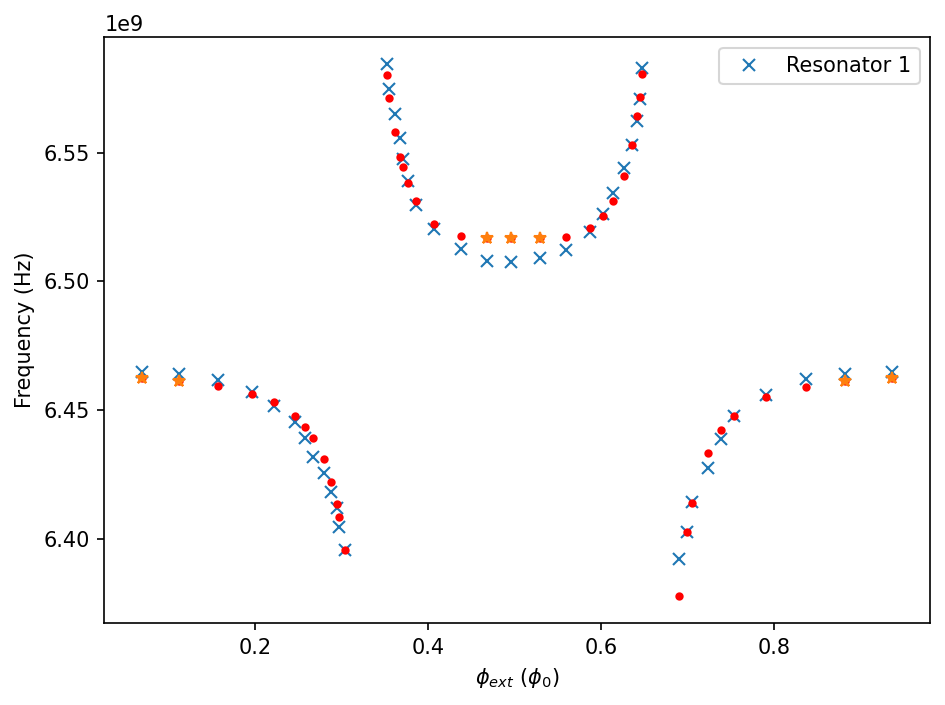

In [316]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')
ax.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [281]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.005062569861512271
0.03763601600739189
0.0362872011802203
0.4110004062977804
0.008538149568701052
0.005062569861512271
0.005062569861512271
0.005285266168477318
0.4043409597438472
0.2025754268461748
0.20581799613205398
0.10093633196195388
0.1033487217544775
0.04997353280777405
0.05217996927936666
0.024461535944034208
0.06645266562428022
0.014703718252270048
0.04521693589135255
0.015186269317932627
0.02678824568563223
0.011822682534541563
0.020055299696191006
0.008379419678909324
0.01702273028917922
0.008642295553685318
0.014852327949694787
0.007329048155651916
0.009994587887437734
0.006204212124308911
0.006617124187159256
0.00836618832020662
0.006414637067743604
0.00731405957249674
0.005371856049171339
0.009233293687502015
0.005563337932259516
0.0059784450301298446
0.006410108286349947
0.005350562507855329
0.006160078278069193
0.005358884730412613
0.006610218360953547
0.005124008092095136
0.00569665759419814
0.0051483709240053785
0.005401793340895978
0.005137762008555933
0.0055340894

In [282]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
error_guess = theoretical_spectrum(parameters_guess, data_set, out='error');
print(f'Error = {error_guess}')
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];
error_opt = theoretical_spectrum(parameters_opt, data_set, out='error');
print(f'Error = {error_opt}')

Guessed parameters 

I0_r1 = 3.7089e-03
I_origin_r1 = -1.8405e-03
ω_r1 = 6.4424e+09
g_q1r1 = 4.5115e+08
ω_q1 = 3.6937e+09
μ_q1 = 1.5650e+10
shift_ω = 2.2064e+07
0.005062569861512271
Error = 0.005062569861512271


Optimized parameters 

I0_r1 = 3.7169e-03
I_origin_r1 = -1.8445e-03
ω_r1 = 6.4420e+09
g_q1r1 = 4.4787e+08
ω_q1 = 3.6937e+09
μ_q1 = 1.5650e+10
shift_ω = 2.2519e+07
0.005057776464328202
Error = 0.005057776464328202


In [283]:
model_r1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 

## Plot fits and errors

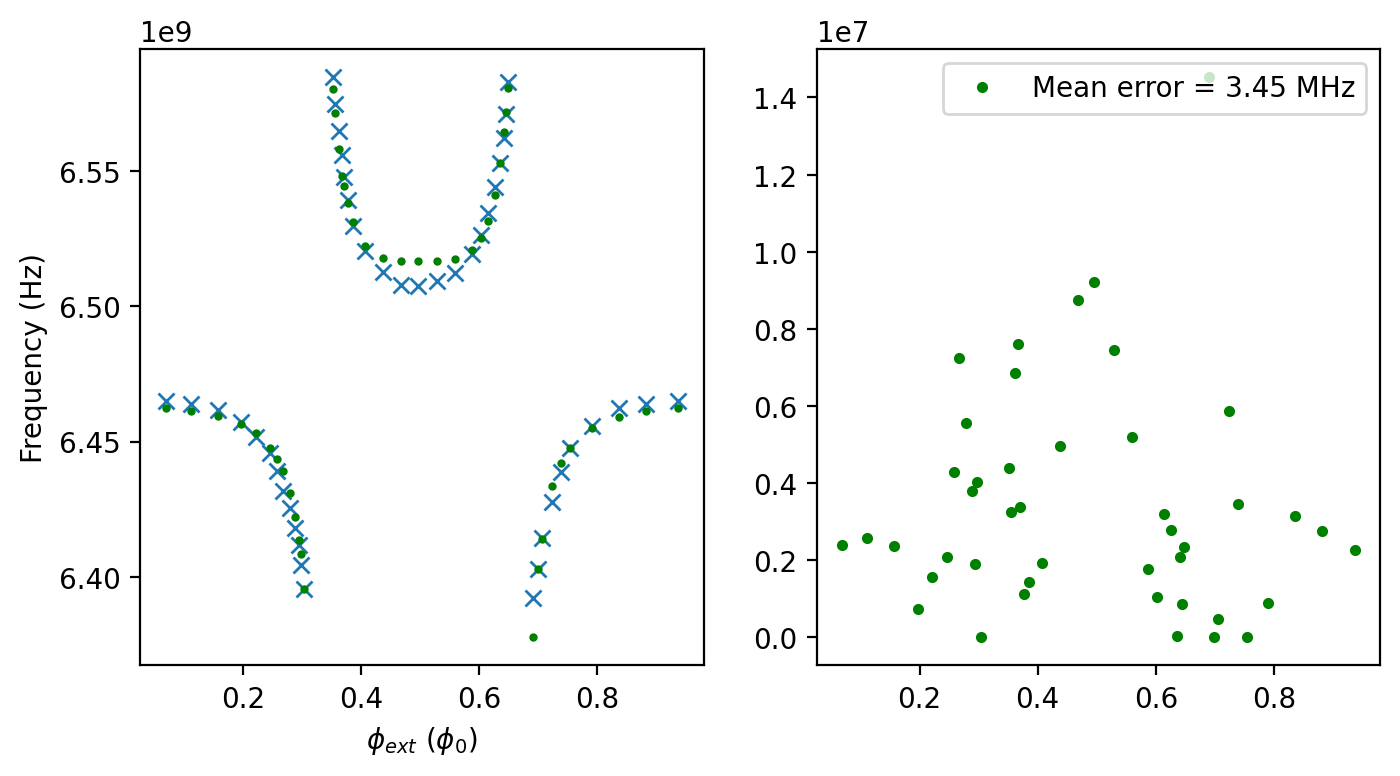

In [284]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_opt, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

 # Qubit 1 and Resonator 1 

In [285]:
load = False

In [286]:
experiment_names = ['qubit_1', 'resonator_1']
models = [model_q1, model_r1]
# models[0][-1] = [2,3]
# models[1][-1] = [2,3,4,5]

In [287]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt = model[1]
    flexible_param_indices = model[-1]
    print('\n Guessed parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];
    print(flexible_param_indices)


 Guessed parameters 

I0_q1 = 2.6004e-03
I_origin_q1 = -1.2887e-03
ω_q1 = 3.6937e+09
μ_q1 = 1.5650e+10
[2, 3]

 Guessed parameters 

I0_r1 = 3.7169e-03
I_origin_r1 = -1.8445e-03
ω_r1 = 6.4420e+09
g_q1r1 = 4.4787e+08
ω_q1 = 3.6937e+09
μ_q1 = 1.5650e+10
shift_ω = 2.2519e+07
[0, 1, 2, 3, 6]


In [288]:
if load:
    for i, experiment_name in enumerate(experiment_names):
        parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
        models[i][1] = parameters_opt
else:
    parameters_opt_list, models = fits.fit_multiple_models(models, method='Nelder-Mead')
    for parameters_opt, experiment_name in zip(parameters_opt_list, experiment_names):
        np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt)

0.0012596647806670665
0.005057776464328202
0.1400624702993431
0.005057776464328202
0.1319046321310651
0.005057776464328202
0.1812152987912756
0.01107088894125041
0.008150783414454113
0.010523039976816525
0.0012596647806670665
0.037495986927381535
0.0012596647806670665
0.0357960946863127
0.0012596647806670665
0.4104652192295632
0.0012596647806670665
0.007771391917112003
0.0012596647806670665
0.0051696307974739945
0.040462878902485545
0.3999135069905382
0.010242582705361799
0.2061454676399917
0.030388434584904044
0.20011760734696848
0.015278663636752128
0.10409839266322148
0.17706961443247224
0.02001476184018937
0.09151331422416917
0.010982094266392167
0.1872384277011668
0.026944139373204577
0.061446712333651045
0.008172495508680388
0.19050664438926032
0.028382797307815635
0.061846666879378495
0.008494959590791855
0.008804945298079275
0.09573821042152701
0.010422209016379356
0.04589209712651116
0.08533538622025455
0.0148189856678542
0.041163902929052594
0.009249646977659095
0.08038747695

In [289]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt  = model[1]
    print('Optimized parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Optimized parameters 

I0_q1 = 2.6007e-03
I_origin_q1 = -1.2888e-03
ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
Optimized parameters 

I0_r1 = 3.7176e-03
I_origin_r1 = -1.8448e-03
ω_r1 = 6.4419e+09
g_q1r1 = 4.4779e+08
ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
shift_ω = 2.2625e+07


### Plot guess to check

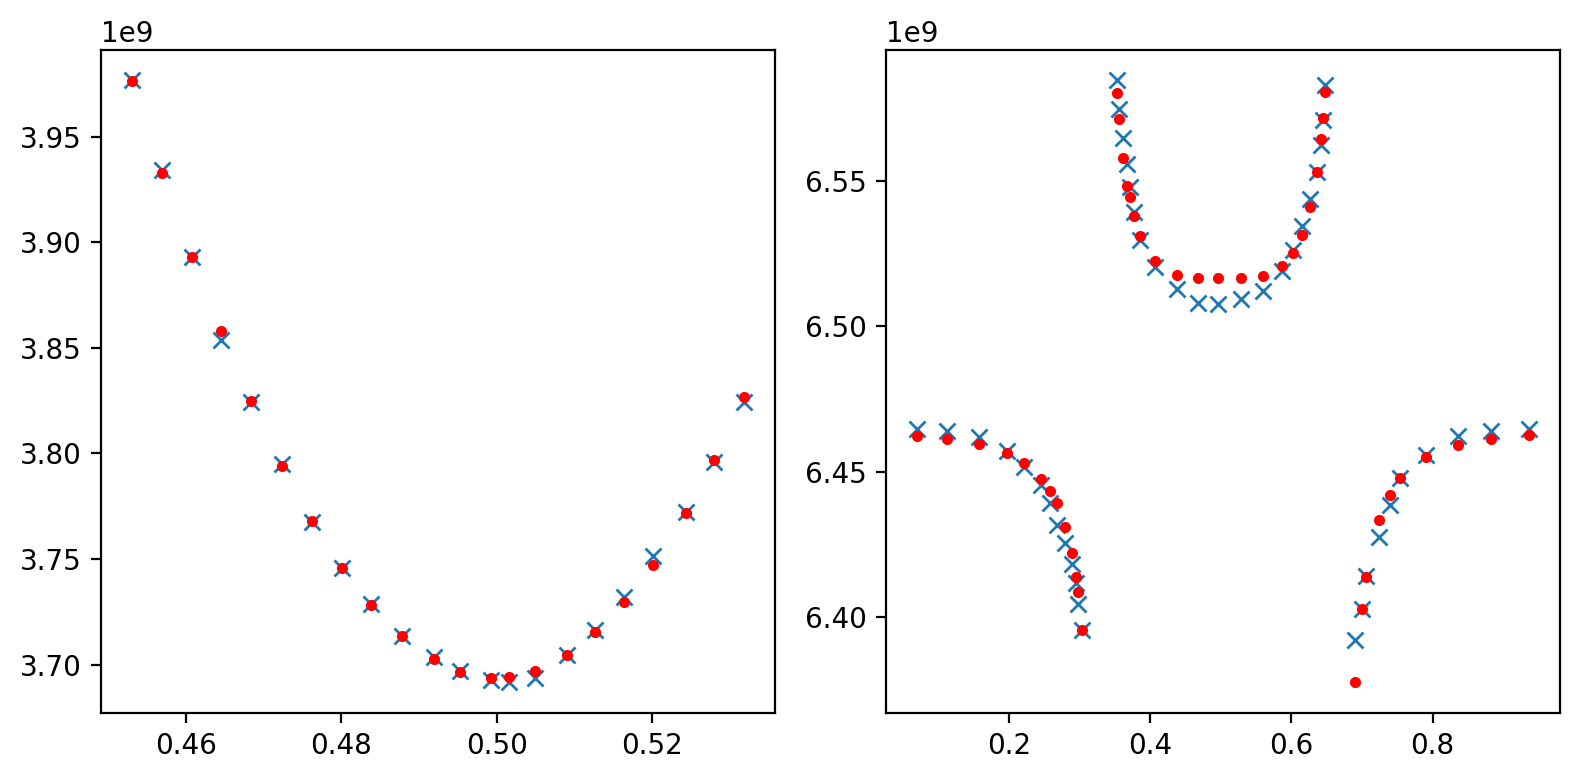

In [290]:
φ_ext_and_ω_list, ω_exp_list = fits.return_spectra_multiple_models(models)
fig, axs = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for i, (ax, (φ_ext_opt, ω_opt), ω_exp) in enumerate(zip(axs, φ_ext_and_ω_list, ω_exp_list )):
    ax.plot(φ_ext_opt, ω_exp, 'x')
    ax.plot(φ_ext_opt, ω_opt, '.r')
    
# ax2.set_ylim([6.35e9,6.65e9])
fig.tight_layout()

# Qubit 2

In [629]:
experiment_name = 'qubit_2'
load = True


### Load spectral data and theoretical model

In [630]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:20]
ω_exp = ω_exp[:20]
I_exp = I_exp[:20]

In [631]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [632]:
I0_q2, I_origin_q2, ω_q2, μ_q2 = np.load(os.getcwd() + opt_dir +  experiment_name + '.npz')['parameters_opt']

parameters_guess = [I0_q2, I_origin_q2, ω_q2, μ_q2]
parameter_names = ['I0_q2', 'I_origin_q2', 'ω_q2', 'μ_q2']
flexible_param_indices = [2,3]
bounds = fits.create_bounds(parameters_guess, flexible_param_indices)
data_set = ([I_exp, ω_exp])

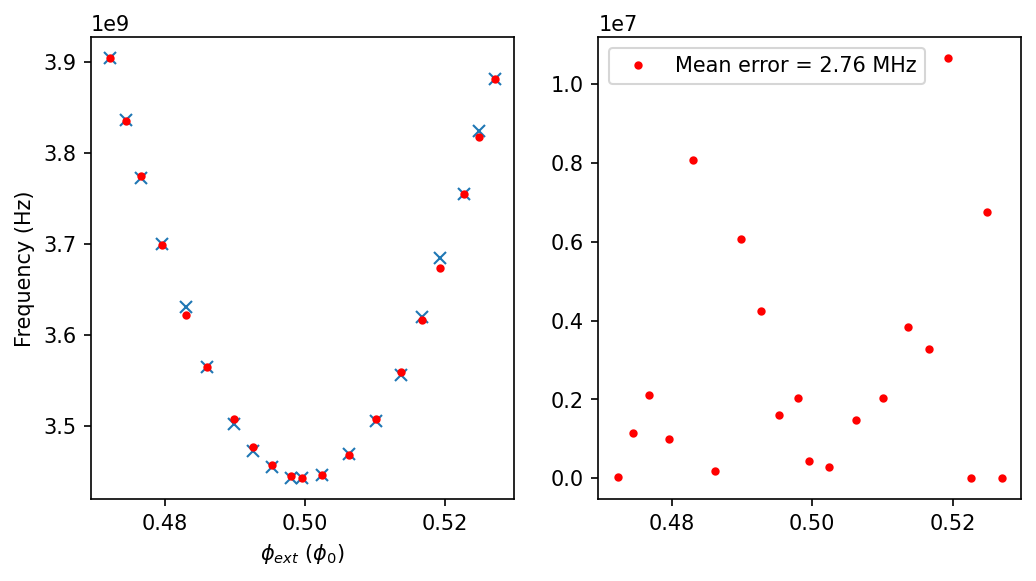

In [633]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')

ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess   - ω_exp), 'r.'   , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()
# ax.set_ylim([3.4e9,4e9])
# ax.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [634]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [635]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')

Guessed parameters 


TypeError: 'NoneType' object is not iterable

In [636]:
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Optimized parameters 

I0_q2 = 4.3905e-03
I_origin_q2 = -4.3993e-03
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10


In [637]:
model_q2 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 

## Plot fits and errors

(0.45, 0.55)

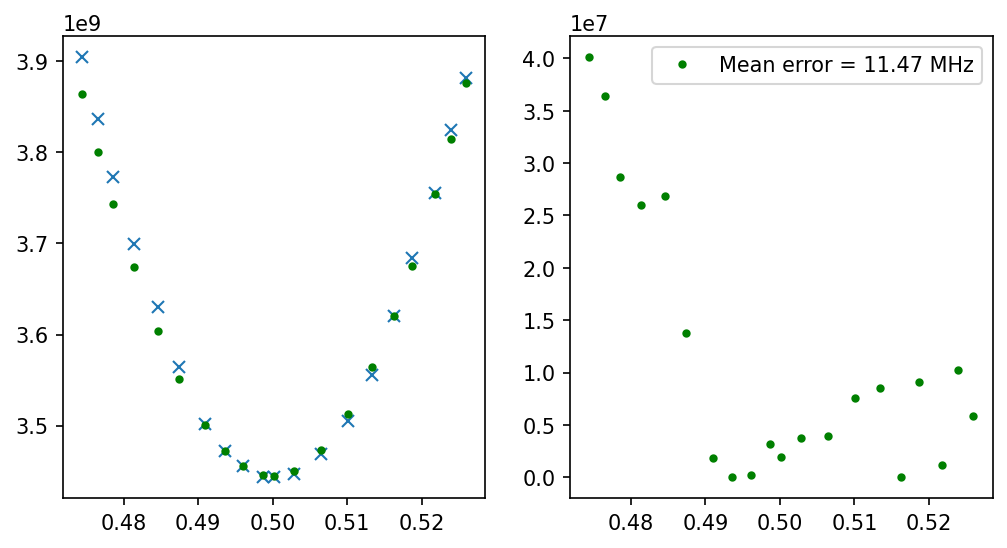

In [300]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_opt, ω_exp, 'x')
ax1.plot(φ_ext_opt, ω_opt, 'g.')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax.set_ylim([3.4e9,4e9])
ax.set_xlim([0.45,0.55])

# Resonator 2

In [400]:
experiment_name = 'resonator_2'

## Load spectral data and theoretical model

In [401]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [402]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [403]:
I0_r2,  I_origin_r2,  ω_r2,  g_q2r2,  ω_q2,   μ_q2, shift_ω_r2 = np.load(os.getcwd() + opt_dir +  experiment_name + '.npz')['parameters_opt']

crossing_index_1  = 11
crossing_index_2  = 9
extra_important_indices = [17, 18, 19]
important_multiplier = 1


parameter_names = ['I0_r2', 'I_origin_r2', 'ω_r2', 'g_q2r2',  'ω_q2', 'μ_q2', 'shift_ω_r2']
parameters_guess = [I0_r2,  I_origin_r2,  ω_r2,  g_q2r2,  ω_q2,   μ_q2, shift_ω_r2 ]
flexible_param_indices = [0, 1, 2, 3, 6]
blocked_indices = [4, 5]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
bounds = fits.create_bounds(parameters_guess, flexible_param_indices, blocked_indices)

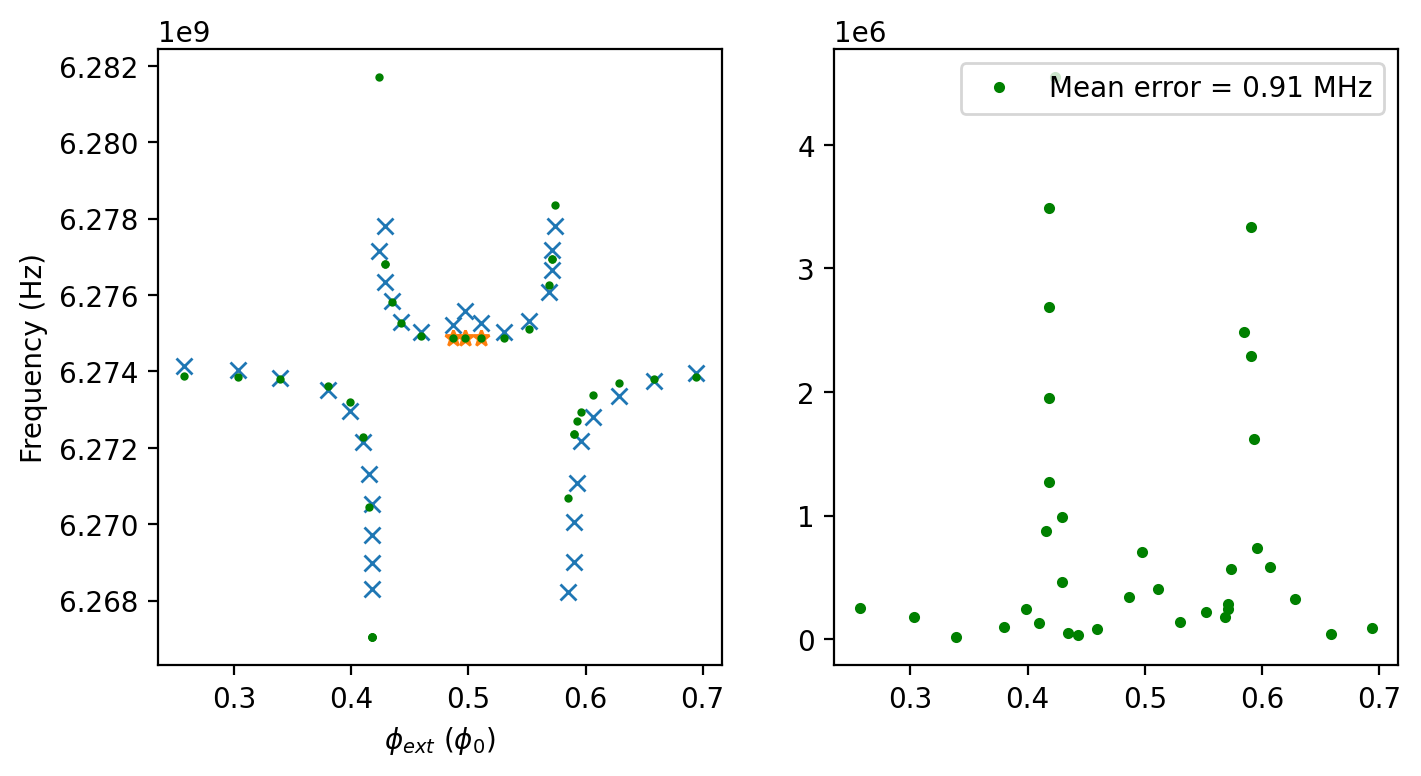

In [404]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')
ax1.plot(φ_ext_guess, ω_guess, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

## Optimize or load previous optimization

In [381]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.005675535883989388
0.11858212678386972
0.00803442652710119
0.22508143894771568
0.005834660474769892
0.005675535883989388
0.005675535883989388
0.0057412501697036745
0.2219853141462276
0.11644884093971629
0.11392836633788188
0.11828096816433309
0.059480790617825643
0.1191563931416042
0.04098716214915821
0.056131458443328425
0.028401421833668845
0.05097893600630433
0.01266716703740169
0.03017509137457218
0.01591933479236208
0.016333398943985885
0.009956295804760387
0.02194244387405229
0.005209092095745414
0.009481047138309696
0.006562401238912119
0.0035597886295116424
0.005710188277741051
0.0060067618996114455
0.005054175134207181
0.0034121754668837412
0.00352047654477956
0.003658478379200363
0.004164010684288325
0.005482386187387576
0.007837070727437102
0.003892486104205213
0.005059708374517659
0.005663693516491291
0.004058524883237757
0.005020212512714686
0.006154033953648567
0.0036855961202774045
0.0046048972616474695
0.0038229967217709676
0.004347014046574592
0.0036739788047106337
0

In [382]:
model_r2 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 

In [383]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')

Guessed parameters 

I0_r2 = 4.7450e-03
I_origin_r2 = 1.6750e-04
ω_r2 = 6.2733e+09
g_q2r2 = 1.0000e+08
ω_q2 = 3.4432e+09
μ_q2 = 3.2684e+10
shift_ω_r2 = 2.0000e+06


In [384]:
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Optimized parameters 

I0_r2 = 5.0433e-03
I_origin_r2 = 1.6750e-05
ω_r2 = 6.2709e+09
g_q2r2 = 6.3889e+07
ω_q2 = 3.4432e+09
μ_q2 = 3.2684e+10
shift_ω_r2 = 3.0420e+06


## Plot fits and errors

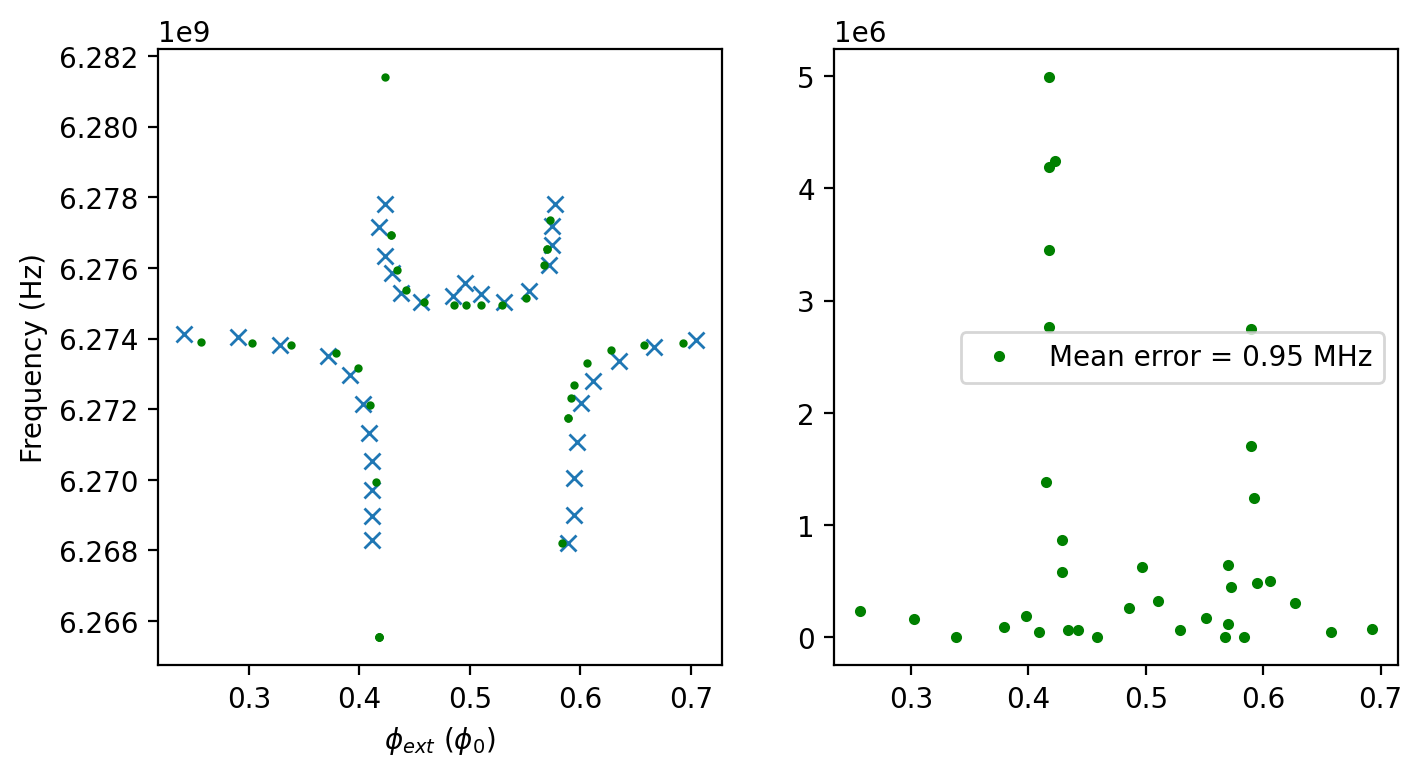

In [385]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 2 and Resonator 2

In [386]:
load = False

In [387]:
experiment_names = ['qubit_2', 'resonator_2']
models = [model_q2, model_r2]
# models[0][-1] = [2,3]
# models[1][-1] = [2,3,4,5]

In [389]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt = model[1]
    flexible_param_indices = model[-1]
    print('\n Guessed parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];
    print(flexible_param_indices)


 Guessed parameters 

I0_q2 = 4.3941e-03
I_origin_q2 = -4.4028e-03
ω_q2 = 3.4432e+09
μ_q2 = 3.2684e+10
[2, 3]

 Guessed parameters 

I0_r2 = 5.0433e-03
I_origin_r2 = 1.6750e-05
ω_r2 = 6.2709e+09
g_q2r2 = 6.3889e+07
ω_q2 = 3.4432e+09
μ_q2 = 3.2684e+10
shift_ω_r2 = 3.0420e+06
[0, 1, 2, 3, 6]


In [390]:
if load:
    for i, experiment_name in enumerate(experiment_names):
        parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
        models[i][1] = parameters_opt
else:
    parameters_opt_list, models = fits.fit_multiple_models(models, method='Nelder-Mead')
    for parameters_opt, experiment_name in zip(parameters_opt_list, experiment_names):
        np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt)

0.007492974966728424
0.0003158358991796221
0.43532066575138845
0.0003158358991796221
1.2143840170885303
0.0003158358991796221
0.15892927588925182
0.0006526620092251914
0.011999382348102427
0.002161463673693766
0.007492974966728424
0.12514319168084462
0.007492974966728424
0.00033196877561776297
0.007492974966728424
0.2189782834549742
0.007492974966728424
0.000352154188646589
0.007492974966728424
0.0003442090857407161
1.4773613057668797
0.053100843969028394
0.45265697759540047
0.012532277069475255
0.5861207757386302
0.037886016464715656
0.18883317098640573
0.01871493215401075
0.6101639620690148
0.058265622915602604
0.19960630833128915
0.01356566756697088
0.03831655941360891
0.2135209436122649
0.009412465644539928
0.1120620657904911
0.28021243437805565
0.020060730989011982
0.08860926128642058
0.014235969483503613
0.2115931620031522
0.013000247792579734
0.09229626311079736
0.016562105621873748
0.15618094121016252
0.04126694755992841
0.07985075020331289
0.008571784927695628
0.02642916546366

In [392]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt  = model[1]
    print('Optimized parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Optimized parameters 

I0_q2 = 4.3905e-03
I_origin_q2 = -4.3993e-03
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
Optimized parameters 

I0_r2 = 5.0343e-03
I_origin_r2 = 1.6378e-05
ω_r2 = 6.2708e+09
g_q2r2 = 6.2131e+07
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
shift_ω_r2 = 3.0789e+06


### Plot guess to check

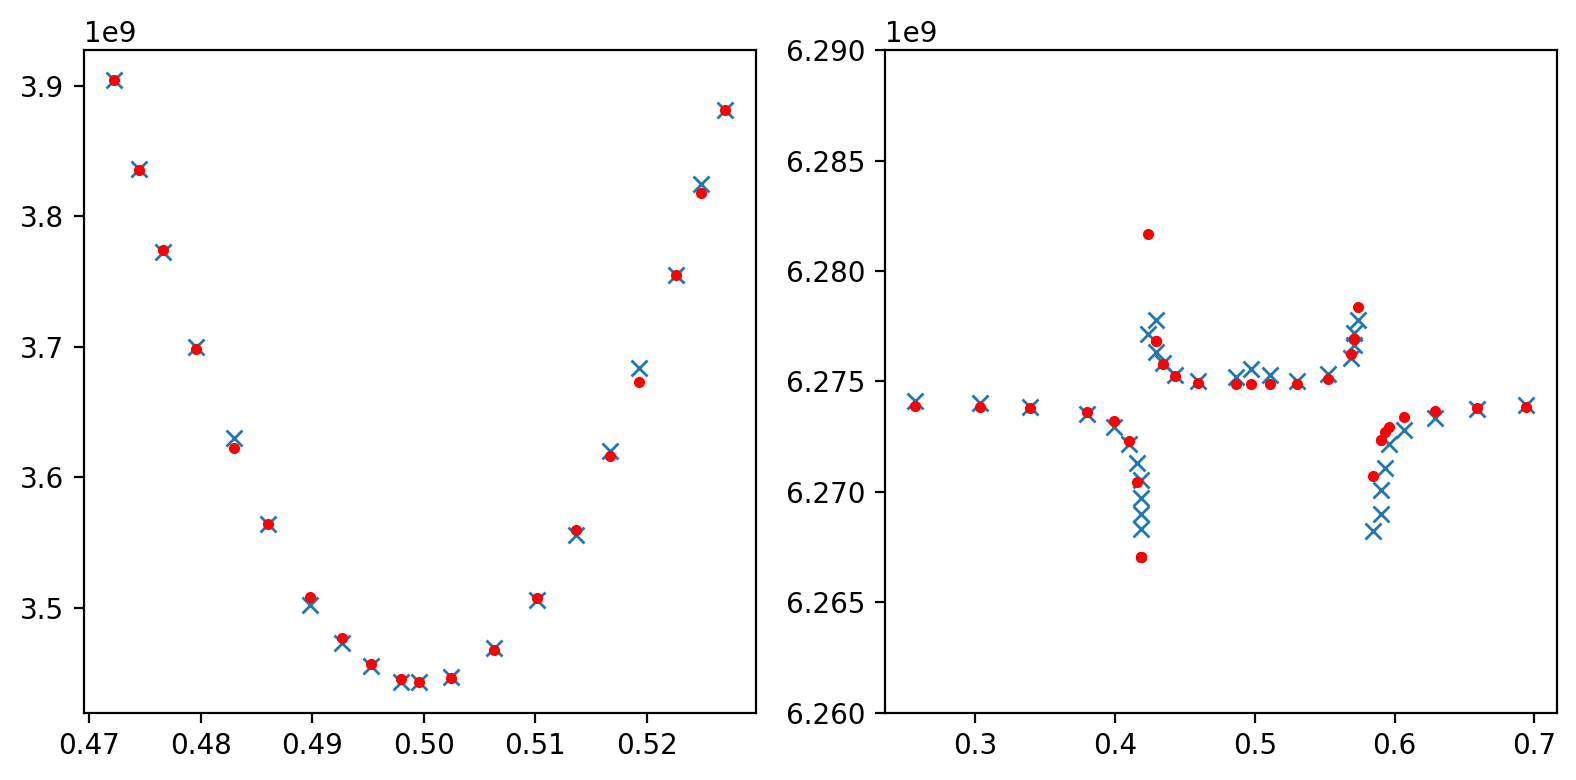

In [391]:
φ_ext_and_ω_list, ω_exp_list = fits.return_spectra_multiple_models(models)
fig, axs = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for i, (ax, (φ_ext_opt, ω_opt), ω_exp) in enumerate(zip(axs, φ_ext_and_ω_list, ω_exp_list )):
    ax.plot(φ_ext_opt, ω_exp, 'x')
    ax.plot(φ_ext_opt, ω_opt, '.r')
    
axs[1].set_ylim([6.26e9,6.29e9])
fig.tight_layout()

# Qubit 3

In [638]:
experiment_name = 'qubit_3'
method = 'Nelder-Mead'
load = True


### Load spectral data and theoretical model

In [639]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp   = φ_ext_exp [:24]
ω_exp       = ω_exp     [:24]
I_exp       = I_exp     [:24]

In [640]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [641]:
I0_q3, I_origin_q3, ω_q3, μ_q3 = np.load(os.getcwd() + opt_dir +  experiment_name + '.npz')['parameters_opt']

parameters_guess = [I0_q3, I_origin_q3, ω_q3, μ_q3]
parameter_names = ['I0_q3', 'I_origin_q3', 'ω_q3', 'μ_q3']
flexible_param_indices=[0,1,2,3]
bounds = fits.create_bounds(parameters_guess, flexible_param_indices)
data_set = ([I_exp, ω_exp])

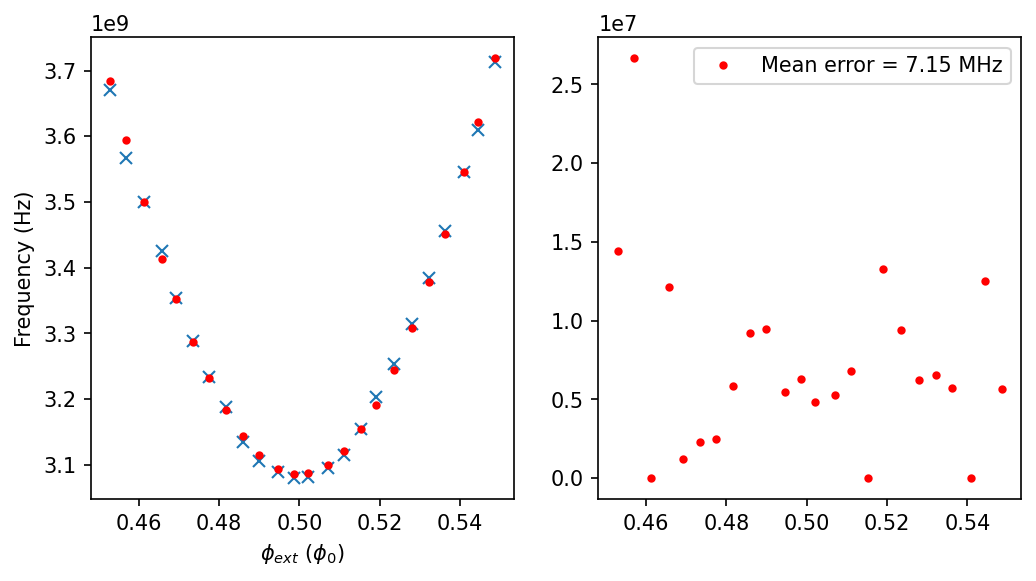

In [642]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
# ax1.set_ylim([3.4e9,4e9])
# ax1.set_xlim([0.45,0.55])

ax2.plot(φ_ext_guess, np.abs(ω_guess   - ω_exp), 'r.'   , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()


## Optimize or load previous optimization

In [643]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method, tol = 1e-14).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [644]:
model_q3 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 

In [645]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 


TypeError: 'NoneType' object is not iterable

## Plot fits and errors

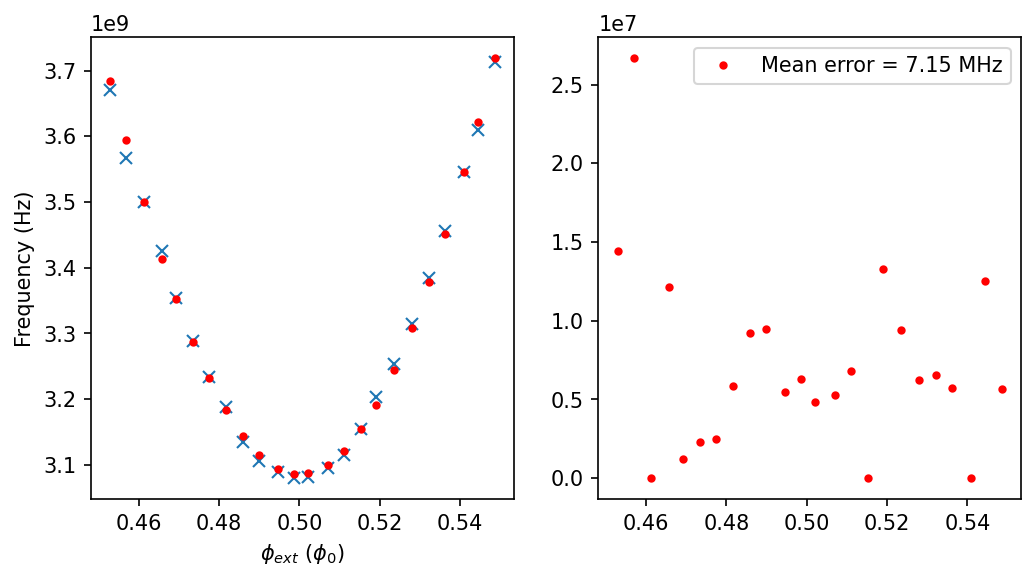

In [196]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_opt, ω_exp, 'x')
ax1.plot(φ_ext_opt, ω_opt, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
# ax1.set_ylim([3.4e9,4e9])
# ax1.set_xlim([0.45,0.55])

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'r.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Resonator 3

In [612]:
experiment_name = 'resonator_3'
load = True

### Load spectral data and theoretical model

In [613]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [614]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [618]:
I0_r3,  I_origin_r3, ω_r3, g_q3r3, ω_q3, μ_q3, shift_ω_r3 = np.load(os.getcwd() + opt_dir +  experiment_name + '.npz')['parameters_opt']
_, _ , ω_q3, μ_q3= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']

crossing_index_1  = 10
crossing_index_2  = 8
extra_important_indices = [14, 15, 16]
important_multiplier = 1
flexible_param_indices = [0,1,2,3,6]
blocked_indices = [4, 5]
parameter_names = ['I0_r3',  'I_origin_r3', 'ω_r3', 'g_q3r3', 'ω_q3', 'μ_q3', 'shift_ω_r3'  ]
parameters_guess = [I0_r3,  I_origin_r3, ω_r3, g_q3r3, ω_q3, μ_q3, shift_ω_r3  ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
bounds = fits.create_bounds(parameters_guess, flexible_param_indices, blocked_indices)

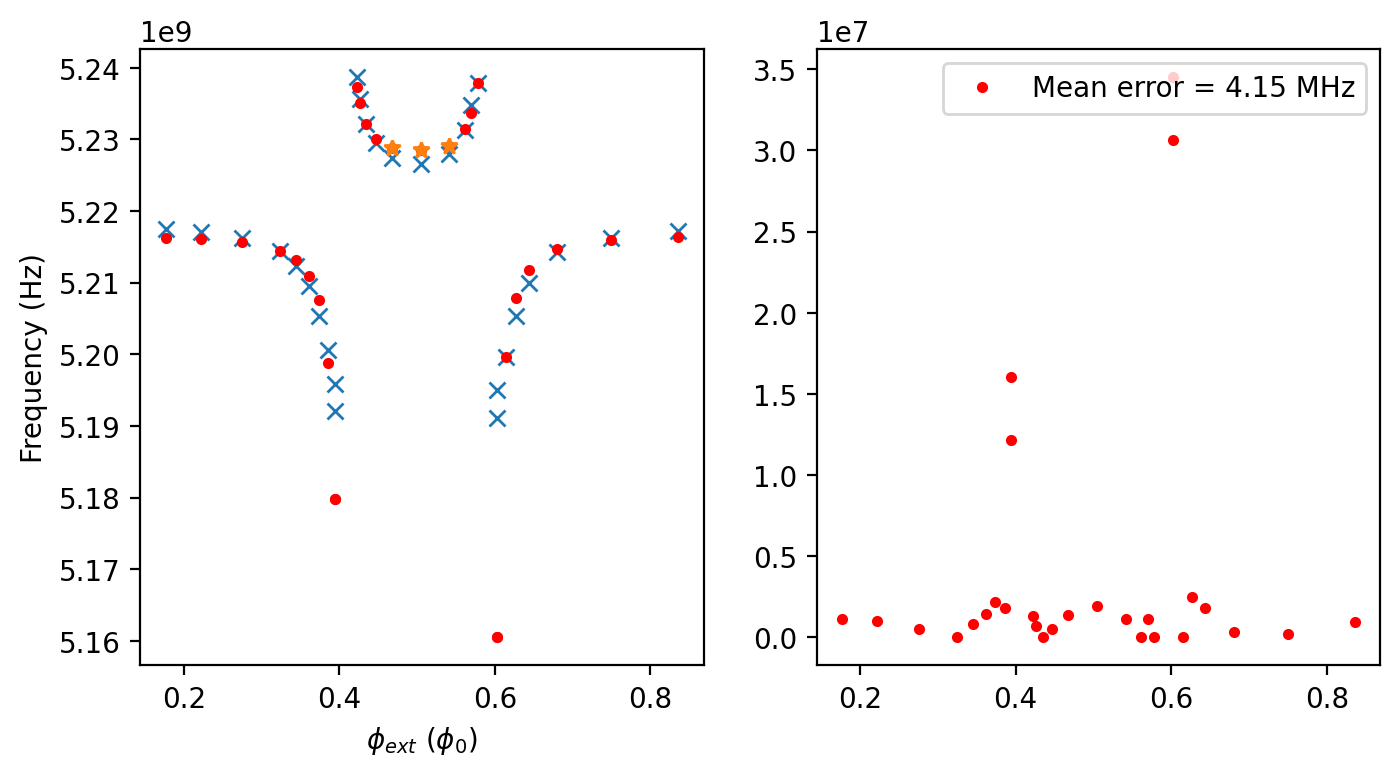

In [619]:
φ_ext_guess , ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.legend()

## Optimize or load previous optimization

In [580]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.010062097585706099
0.0624531917115051
0.022866129458299023
0.22545711917195788
0.010925000227427517
0.010062097585706099
0.010062097585706099
0.010062097585706099
0.2035012502207927
0.10285840067170549
0.11634141539550366
0.05308039171626292
0.08545553649651731
0.02721953887471356
0.059882572897524966
0.02774534920957058
0.033421995015652864
0.01588257036088419
0.024115030430461034
0.01089183334248478
0.05130061615517766
0.009683608565741164
0.020853845791203533
0.01008146566348069
0.007198617908948183
0.009310858311654568
0.014868262073213543
0.007917737681861537
0.012367921277217354
0.008300991477613552
0.007800755345143012
0.009342148624317578
0.012458231554087946
0.007677121483442341
0.013709385102923018
0.007579159877130168
0.010180595289079665
0.0079914689170256
0.00895657893596421
0.007624019219726733
0.00860667458380018
0.007459197838515452
0.008747575395378215
0.007407359854117393
0.00714309775091672
0.007587735895258937
0.00863096655280035
0.0072622508546990325
0.0072222616

In [581]:
model_r3 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 

In [582]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0_r3 = 2.3999e-03
I_origin_r3 = -9.0995e-04
ω_r3 = 5.2151e+09
g_q3r3 = 1.8476e+08
ω_q3 = 3.0807e+09
μ_q3 = 2.1687e+10
shift_ω_r3 = 0.0000e+00


Optimized parameters 

I0_r3 = 2.9301e-03
I_origin_r3 = -1.1849e-03
ω_r3 = 5.2161e+09
g_q3r3 = 1.8729e+08
ω_q3 = 3.0807e+09
μ_q3 = 2.1687e+10
shift_ω_r3 = 0.0000e+00


## Plot fits and errors

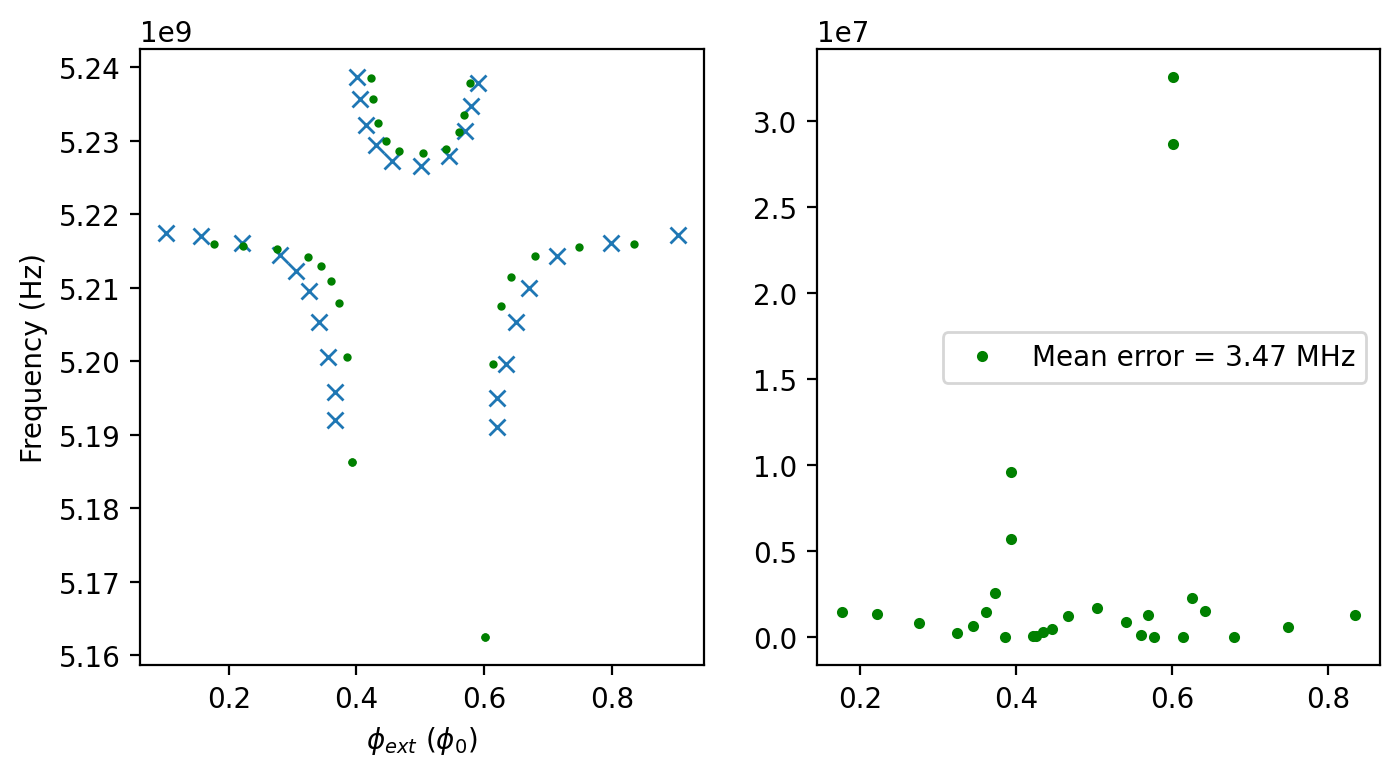

In [583]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 3 and Resonator 3

In [601]:
load = False

In [602]:
experiment_names = ['qubit_3', 'resonator_3']
models = [model_q3, model_r3]
# models[0][-1] = [2,3]
# models[1][-1] = [2,3,4,5]

In [603]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt = model[1]
    flexible_param_indices = model[-1]
    print('\n Guessed parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];
    print(flexible_param_indices)


 Guessed parameters 

I0_q3 = 2.4048e-03
I_origin_q3 = -1.4885e-03
ω_q3 = 3.0856e+09
μ_q3 = 2.1379e+10
[0, 1, 2, 3]

 Guessed parameters 

I0_r3 = 2.9301e-03
I_origin_r3 = -1.1849e-03
ω_r3 = 5.2161e+09
g_q3r3 = 1.8729e+08
ω_q3 = 3.0807e+09
μ_q3 = 2.1687e+10
shift_ω_r3 = 0.0000e+00
[0, 1, 2, 3, 6]


In [604]:
if load:
    for i, experiment_name in enumerate(experiment_names):
        parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
        models[i][1] = parameters_opt
else:
    parameters_opt_list, models = fits.fit_multiple_models(models, method='Nelder-Mead')
    for parameters_opt, experiment_name in zip(parameters_opt_list, experiment_names):
        np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt)

0.007152818611057797
0.0008683841815873554
0.3182882968139992
0.0008683841815873554
0.4338595272638268
0.0008683841815873554
0.14617713604886415
0.0016168442278449535
0.02420440580852455
0.0014115994779428413
0.007152818611057797
0.029534930025378124
0.007152818611057797
0.013064002570721933
0.007152818611057797
0.22098656911713707
0.007152818611057797
0.0012205394332939217
0.007152818611057797
0.0008683841815873554
0.5271203789743347
0.04933940272644407
0.1901908774740182
0.01226384670339145
0.44615777796061645
0.052084848012018105
0.155308755255602
0.012950609033844778
0.04031480127324591
0.21464524559482662
0.011969950751257718
0.11197510002417285
0.2349415655082653
0.01564655778617215
0.08606399095685562
0.013109031517152207
0.19315180368934112
0.01499543612254572
0.07664122576971398
0.013461208759575299
0.12942288079966582
0.029903944017895836
0.07691074023165961
0.008159267623700244
0.018933436546991627
0.10419177885255652
0.017041400834075054
0.05020669644107968
0.10659651750911

In [605]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt  = model[1]
    print('Optimized parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Optimized parameters 

I0_q3 = 2.4051e-03
I_origin_q3 = -1.4886e-03
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
Optimized parameters 

I0_r3 = 2.9250e-03
I_origin_r3 = -1.1847e-03
ω_r3 = 5.2165e+09
g_q3r3 = 1.8556e+08
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
shift_ω_r3 = 0.0000e+00


### Plot guess to check

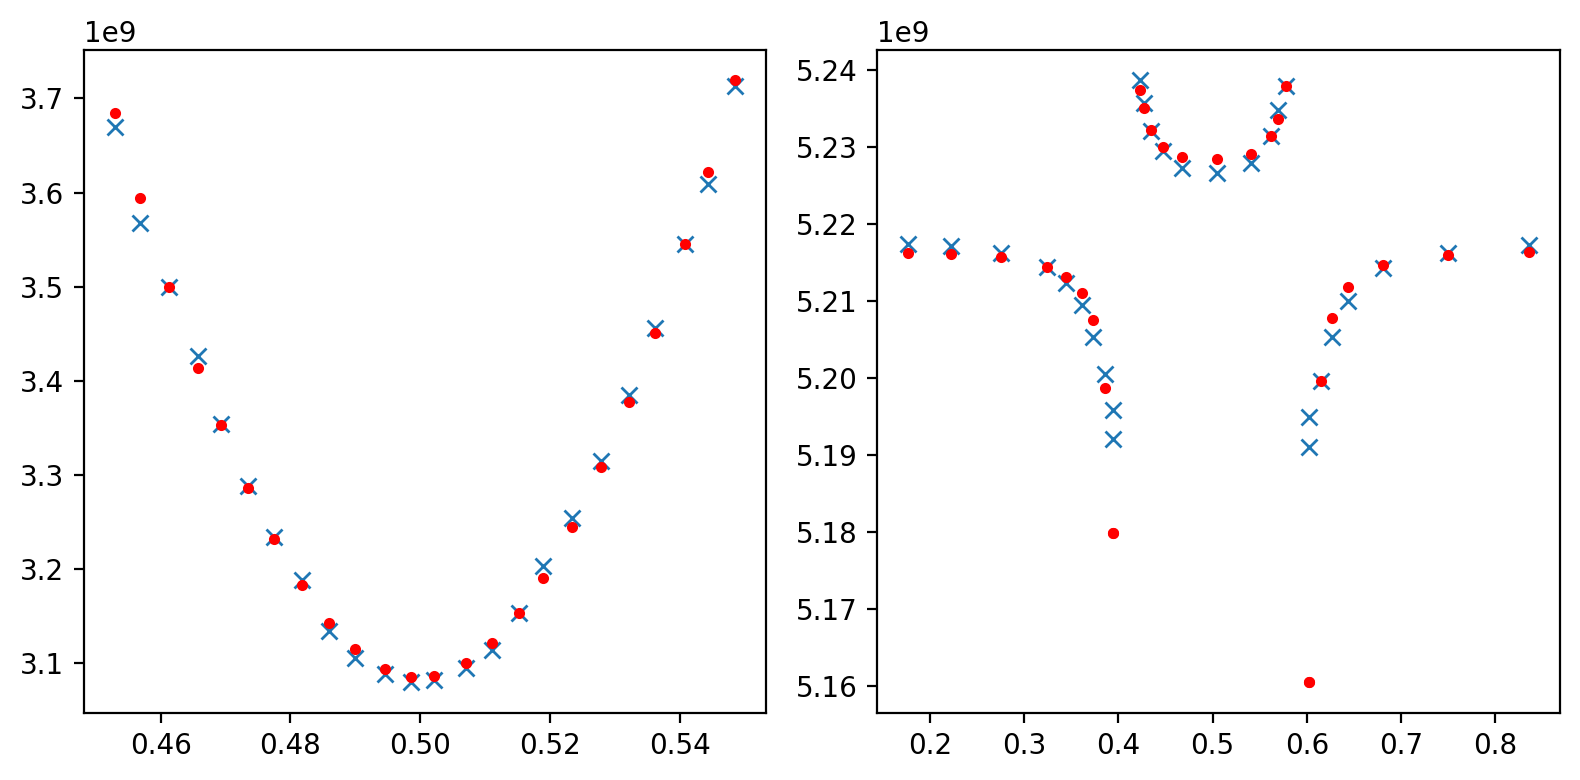

In [606]:
φ_ext_and_ω_list, ω_exp_list = fits.return_spectra_multiple_models(models)
fig, axs = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for i, (ax, (φ_ext_opt, ω_opt), ω_exp) in enumerate(zip(axs, φ_ext_and_ω_list, ω_exp_list )):
    ax.plot(φ_ext_opt, ω_exp, 'x')
    ax.plot(φ_ext_opt, ω_opt, '.r')
    
# axs[1].set_ylim([6.26e9,6.29e9])
fig.tight_layout()

# Qubit 1 - Qubit 2 avoided crossing while Qubit 3 is off-resonant

In [659]:
experiment_name = 'qubit_1_qubit_2'


### Load spectral data and theoretical model

In [660]:
ω_exp, I_exp = fits.get_experimental_spectrum(experiment_name)
ω_exp[0] *= GHz
ω_exp[1] *= GHz

In [661]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [662]:
ω_q1, μ_q1, ω_q2, μ_q2, ω_q3, μ_q3, g_q1q2, g_q2q3, g_q1q3, φ_ext_i_q1q2, φ_ext_f_q1q2, shift_ω_q1q2 =\
    np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2' + '.npz')['parameters_opt'] 

_, _, ω_q1, μ_q1 = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
_, _, ω_q2, μ_q2 = np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
_, _, ω_q3, μ_q3 = np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']

flexible_param_indices=[6,7,8,9,10,11]
blocked_indices = [0,1,2,3,4,5]

data_set = [I_exp, ω_exp]
parameters_guess = [ω_q1, μ_q1, ω_q2, μ_q2, ω_q3, μ_q3, g_q1q2, g_q2q3, g_q1q3, φ_ext_i_q1q2, φ_ext_f_q1q2, shift_ω_q1q2 ]
parameter_names =  ['ω_q1', 'μ_q1', 'ω_q2', 'μ_q2', 'ω_q3', 'μ_q3', 'g_q1q2', 'g_q2q3', 'g_q1q3', 'φ_ext_i_q1q2', 'φ_ext_f_q1q2', 'shift_ω_q1q2' ]
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
bounds = fits.create_bounds(parameters_guess, flexible_param_indices, blocked_indices)

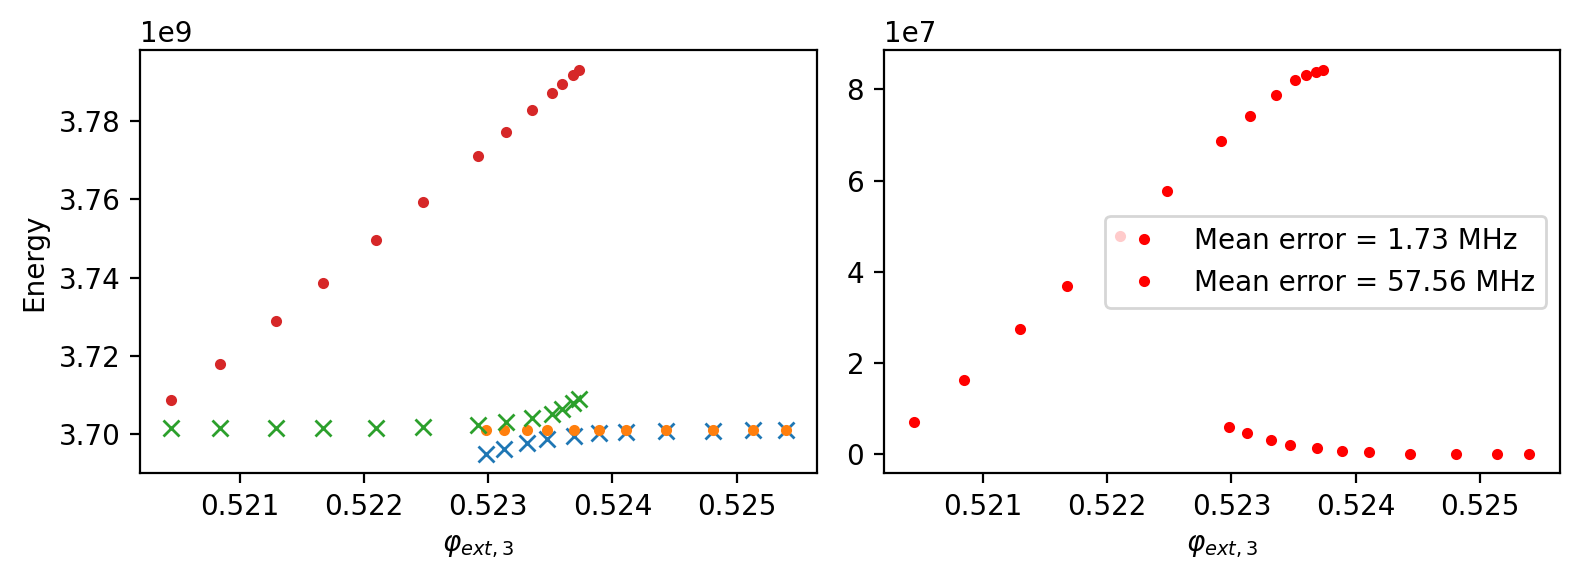

In [663]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=200, figsize = [8,3], ncols=2)

for i in range(len(ω_exp)):
    ax1.plot(φ_ext_guess[i], ω_exp[i], 'x')
    ax1.plot(φ_ext_guess[i], ω_guess[i], '.')
ax1.set_ylabel('Energy')
ax1.set_xlabel(r'$\varphi_{ext,3}$')
# ax1.set_ylim(3.6e9, 3.75e9)


for i in range(len(ω_exp)):
    ax2.plot(φ_ext_guess[i], np.abs(ω_guess[i]-ω_exp[i]), 'r.' , label = f'Mean error = {np.abs(ω_guess[i]-ω_exp[i]).mean()/1e6:.2f} MHz' )
ax2.legend()
ax2.set_xlabel(r'$\varphi_{ext,3}$')

fig.tight_layout()

## Optimize or load previous optimization

In [664]:
load = False

In [665]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.05902872668256613
0.05902872668256613
0.05902872668256613
0.05902872668256613
0.05902872668256613
0.05902872668256613
0.05902872668256613
0.05904355361840431
0.05902995026950213
0.05902872671611291
0.5656242453927864
0.42326618608413624
0.05970633238567235
0.045401880962146715
0.14877495391736903
0.19960076168811722
0.10864809007914628
0.21067542009650428
0.026916928712403775
0.01470812468613643
0.006177738569390444
0.008418965148395317
0.0058394251804587665
0.01584446800958641
0.006331116890180185
0.011737214774442268
0.018488807415881412
0.026779153988298634
0.03693369197339381
0.04850872944765098
0.06207271841854407
0.012821937529708862
0.0658846083328992
0.011625712266363438
0.03718441699127179
0.16466522871491188
0.02682087554278029
0.045465976041858015
0.010671780297774717
0.03795085172714578
0.021625950889099486
0.015842179388549402
0.032034176981302884
0.01644836416501023
0.027979681509750696
0.015511685924935598
0.02222451015395014
0.012845298374704764
0.019403585173545908
0

In [666]:
model_q1q2 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 

In [667]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
g_q1q2 = 2.7755e+06
g_q2q3 = 2.7114e+06
g_q1q3 = 1.7633e+03
φ_ext_i_q1q2 = 5.2045e-01
φ_ext_f_q1q2 = 5.2540e-01
shift_ω_q1q2 = 7.3407e+06


Optimized parameters 

ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
g_q1q2 = 2.8798e+06
g_q2q3 = 2.7037e+06
g_q1q3 = 1.7209e+03
φ_ext_i_q1q2 = 5.1843e-01
φ_ext_f_q1q2 = 5.2140e-01
shift_ω_q1q2 = 7.4956e+06


## Plot fits and errors

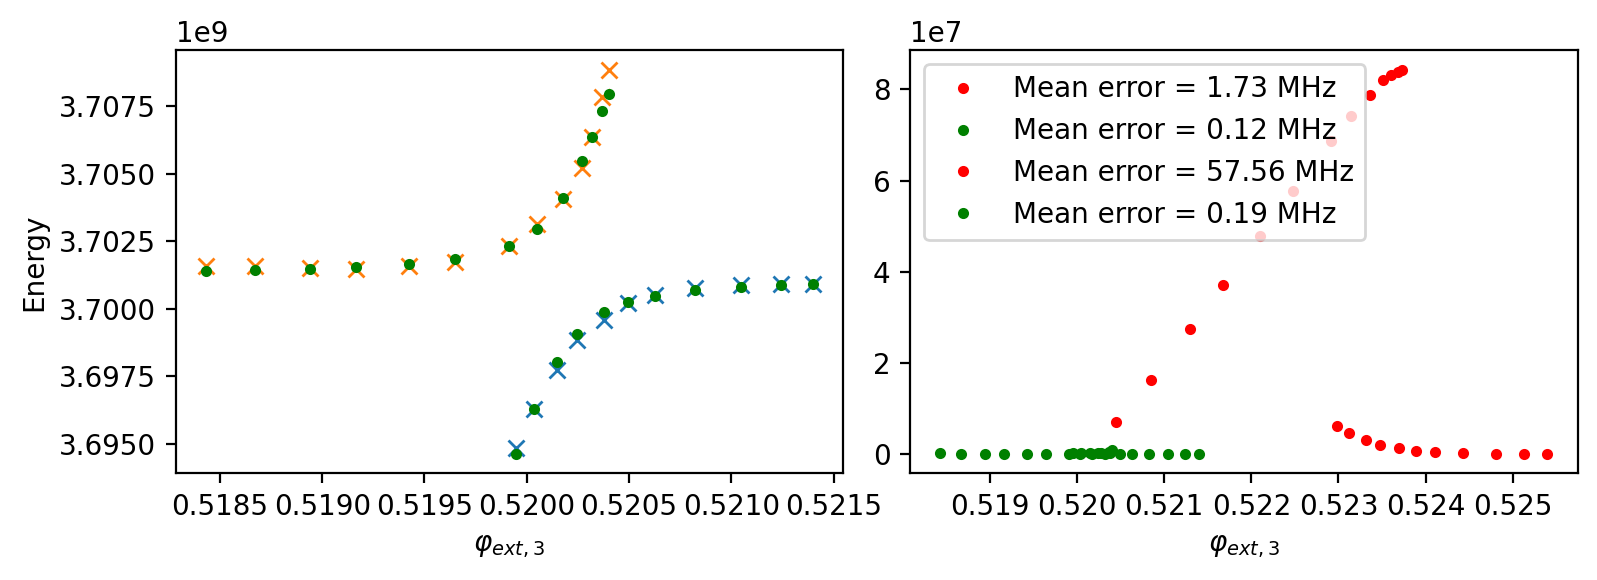

In [668]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=200, figsize = [8,3], ncols=2)

for i in range(len(ω_exp)):
    ax1.plot(φ_ext_opt[i], ω_exp[i], 'x')
    ax1.plot(φ_ext_opt[i], ω_opt[i], '.g')
ax1.set_ylabel('Energy')
ax1.set_xlabel(r'$\varphi_{ext,3}$')

for i in range(len(ω_exp)):
    ax2.plot(φ_ext_guess[i], np.abs(ω_guess[i]-ω_exp[i]), 'r.' , label = f'Mean error = {np.abs(ω_guess[i]-ω_exp[i]).mean()/1e6:.2f} MHz' )
    ax2.plot(φ_ext_opt[i], np.abs(ω_opt[i]-ω_exp[i]), 'g.'   , label = f'Mean error = {np.abs(ω_opt[i]-ω_exp[i]).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax2.set_xlabel(r'$\varphi_{ext,3}$')

fig.tight_layout()

# Qubit 1 - Qubit 2 - Qubit 3
Below, we fix q1 at its half-flux point around 3.7 GHz, move q2 on resonance, and then sweep q3 through 3.7 GHz.

In [698]:
experiment_name = 'qubit_1_qubit_2_qubit_3'
method = 'SlSQP'
load = True

"
### Load spectral data and theoretical model

In [699]:
ω_exp, I_exp = fits.get_experimental_spectrum(experiment_name)
ω_exp[0] *= GHz
ω_exp[1] *= GHz
ω_exp[2] *= GHz

In [700]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [701]:
ω_q1, μ_q1, ω_q2, μ_q2, ω_q3, μ_q3, g_q1q2, g_q2q3, g_q1q3, φ_ext_i_q1q2q3, φ_ext_f_q1q2q3, shift_ω_q1q2q3 =\
    np.load(os.getcwd() + opt_dir +  experiment_name + '.npz')['parameters_opt'] 

_, _, ω_q1, μ_q1 = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
_, _, ω_q2, μ_q2 = np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
_, _, ω_q3, μ_q3 = np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']

flexible_param_indices=[6,7,8,9,10,11]
blocked_indices = [0,1,2,3,4,5]

data_set = [I_exp, ω_exp]
parameters_guess = [ω_q1, μ_q1, ω_q2, μ_q2, ω_q3, μ_q3, g_q1q2, g_q2q3, g_q1q3, φ_ext_i_q1q2q3, φ_ext_f_q1q2q3, shift_ω_q1q2q3 ]
parameter_names =  ['ω_q1', 'μ_q1', 'ω_q2', 'μ_q2', 'ω_q3', 'μ_q3', 'g_q1q2', 'g_q2q3', 'g_q1q3', 'φ_ext_i_q1q2q3', 'φ_ext_f_q1q2q3', 'shift_ω_q1q2q3' ]
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
bounds = fits.create_bounds(parameters_guess, flexible_param_indices, blocked_indices)

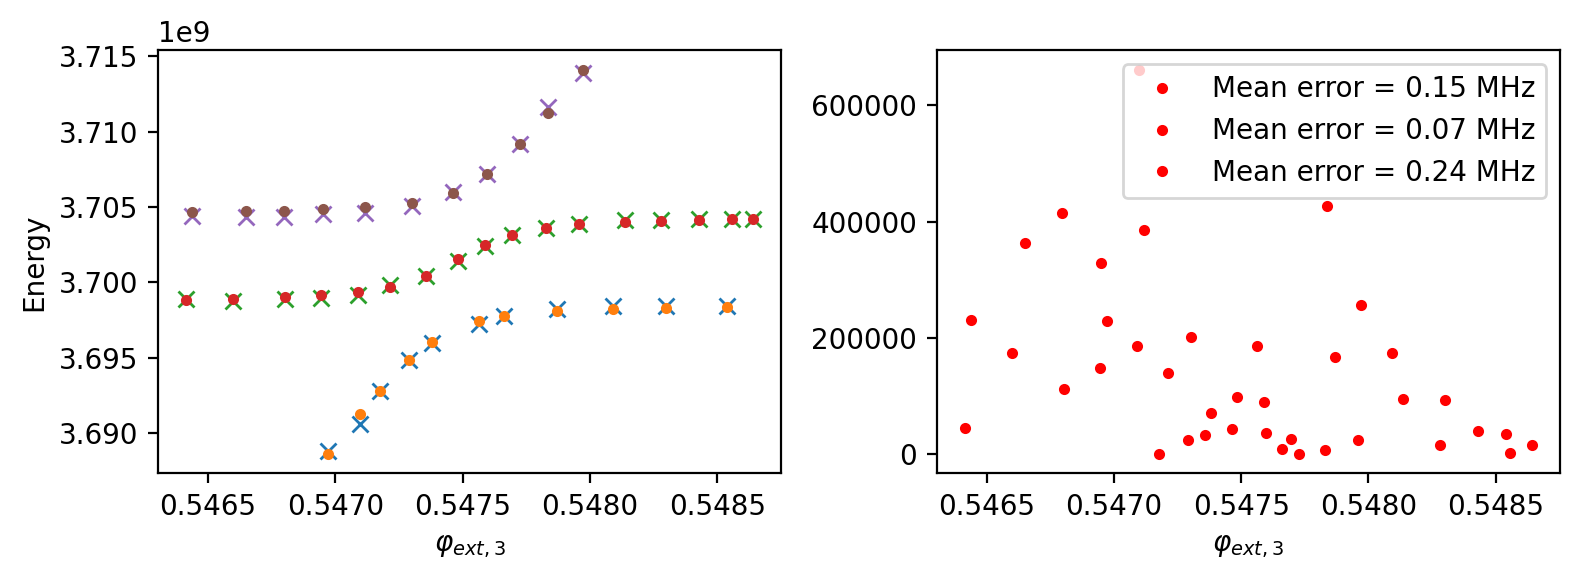

In [702]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=200, figsize = [8,3], ncols=2)

for i in range(len(ω_exp)):
    ax1.plot(φ_ext_guess[i], ω_exp[i], 'x')
    ax1.plot(φ_ext_guess[i], ω_guess[i], '.')
ax1.set_ylabel('Energy')
ax1.set_xlabel(r'$\varphi_{ext,3}$')

for i in range(len(ω_exp)):
    ax2.plot(φ_ext_guess[i], np.abs(ω_guess[i]-ω_exp[i]), 'r.' , label = f'Mean error = {np.abs(ω_guess[i]-ω_exp[i]).mean()/1e6:.2f} MHz' )
ax2.legend()
ax2.set_xlabel(r'$\varphi_{ext,3}$')

fig.tight_layout()

## Optimize or load previous optimization

In [684]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.45585719715915735
0.45585719715915735
0.45585719715915735
0.45585719715915735
0.45585719715915735
0.45585719715915735
0.45585719715915735
0.45593261737190455
0.4558565155592605
0.4558571974416518
0.2633202610075264
0.21437462141071764
0.4545558862066011
0.39384779450445906
0.3826804101521813
0.3692572513647967
0.35316781446946527
0.3338212050094375
0.3104802156539722
0.28222270567475355
0.24789317338628056
0.20604262691625772
0.04498653208235897
0.12834016903566556
0.06089179218909758
0.09248069019266415
0.05118319780008576
0.014130102602281223
0.19718774345635373
0.022395014870176314
0.06180647269004926
0.10372916086842401
0.1414610313742938
0.13137187676710027
0.22535351200653464
0.0908065637971843
0.3881225977174219
0.10810869051360682
0.13350626946027735
0.0699752365962283
0.22276569522396958
0.06106524836822159
0.09626767028908505
0.17230525671822738
0.05379819348313921
0.09746808492136673
0.052451525354264
0.14353288749333093
0.03964223088333971
0.06940566142637555
0.1164863027

In [685]:
model_q1q2q3 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices]

In [686]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
g_q1q2 = 2.7755e+06
g_q2q3 = 2.7114e+06
g_q1q3 = 1.7633e+03
φ_ext_i_q1q2q3 = 5.2045e-01
φ_ext_f_q1q2q3 = 5.2540e-01
shift_ω_q1q2q3 = 7.3407e+06


Optimized parameters 

ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
g_q1q2 = 2.7017e+06
g_q2q3 = 3.1651e+06
g_q1q3 = 1.4810e+03
φ_ext_i_q1q2q3 = 5.4637e-01
φ_ext_f_q1q2q3 = 5.4870e-01
shift_ω_q1q2q3 = 7.7923e+06


## Plot fits and errors

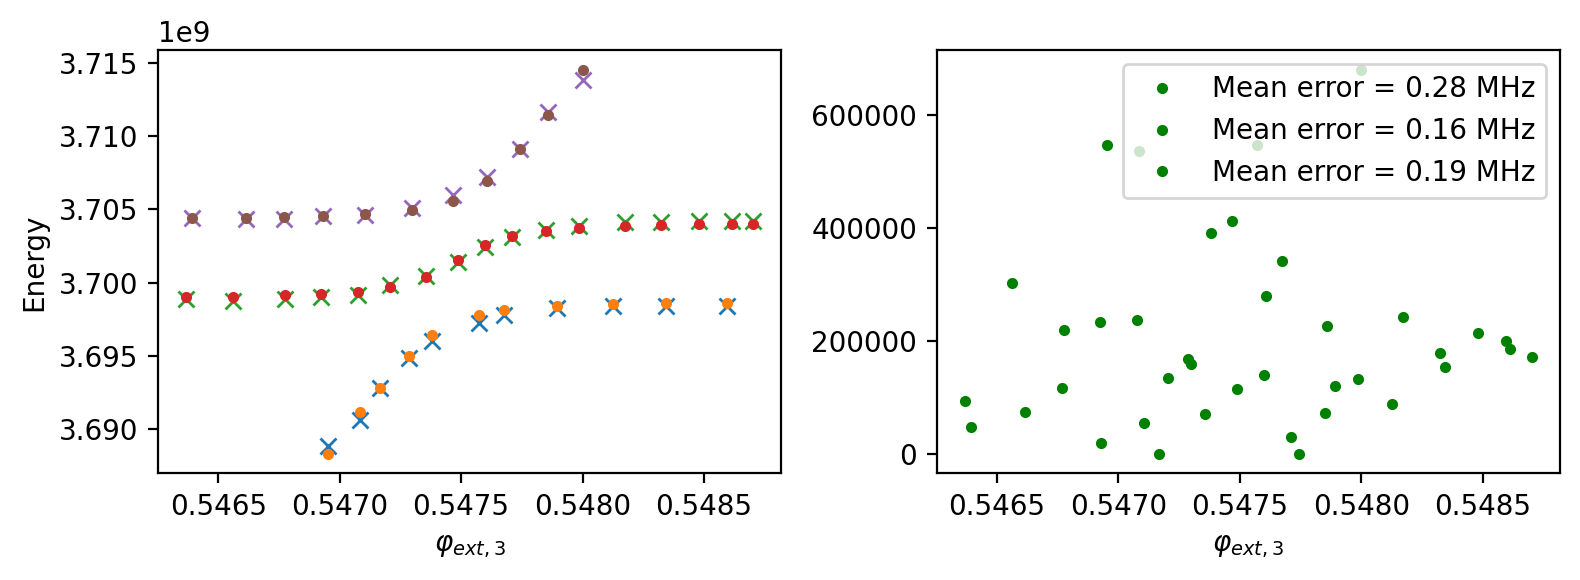

In [687]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=200, figsize = [8,3], ncols=2)

for i in range(len(ω_exp)):
    ax1.plot(φ_ext_opt[i], ω_exp[i], 'x')
    ax1.plot(φ_ext_opt[i], ω_opt[i], '.')
ax1.set_ylabel('Energy')
ax1.set_xlabel(r'$\varphi_{ext,3}$')

for i in range(len(ω_exp)):
    ax2.plot(φ_ext_opt[i], np.abs(ω_opt[i]-ω_exp[i]), 'g.'   , label = f'Mean error = {np.abs(ω_opt[i]-ω_exp[i]).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax2.set_xlabel(r'$\varphi_{ext,3}$')

fig.tight_layout()

# Both crossings

In [688]:
load = False

In [689]:
experiment_names = ['qubit_1', 'qubit_2', 'qubit_3', 'qubit_1_qubit_2', 'qubit_1_qubit_2_qubit_3']
models = [model_q1, model_q2, model_q3, model_q1q2, model_q1q2q3]
# experiment_names = ['qubit_1_qubit_2', 'qubit_1_qubit_2_qubit_3']
# models = [model_q1q2, model_q1q2q3]
# models[0][-1] = [2,3]
# models[1][-1] = [2,3,4,5]

In [690]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt = model[1]
    flexible_param_indices = model[-1]
    print('\n Guessed parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];
    print(flexible_param_indices)


 Guessed parameters 

I0_q1 = 2.6007e-03
I_origin_q1 = -1.2888e-03
ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
[2, 3]

 Guessed parameters 

I0_q2 = 4.3905e-03
I_origin_q2 = -4.3993e-03
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
[2, 3]

 Guessed parameters 

I0_q3 = 2.4051e-03
I_origin_q3 = -1.4886e-03
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
[0, 1, 2, 3]

 Guessed parameters 

ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
g_q1q2 = 2.8798e+06
g_q2q3 = 2.7037e+06
g_q1q3 = 1.7209e+03
φ_ext_i_q1q2 = 5.1843e-01
φ_ext_f_q1q2 = 5.2140e-01
shift_ω_q1q2 = 7.4956e+06
[6, 7, 8, 9, 10, 11]

 Guessed parameters 

ω_q1 = 3.6937e+09
μ_q1 = 1.5652e+10
ω_q2 = 3.4427e+09
μ_q2 = 3.3176e+10
ω_q3 = 3.0856e+09
μ_q3 = 2.1381e+10
g_q1q2 = 2.7017e+06
g_q2q3 = 3.1651e+06
g_q1q3 = 1.4810e+03
φ_ext_i_q1q2q3 = 5.4637e-01
φ_ext_f_q1q2q3 = 5.4870e-01
shift_ω_q1q2q3 = 7.7923e+06
[6, 7, 8, 9, 10, 11]


In [694]:
 if load:
    for i, experiment_name in enumerate(experiment_names):
        parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name, opt_dir)
        models[i][1] = parameters_opt
else:
    parameters_opt_list, models = fits.fit_multiple_models(models, method= 'Nelder-Mead')
    for parameters_opt, experiment_name in zip(parameters_opt_list, experiment_names):
        np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt)

0.0012597504126775048
0.0027635401316361188
0.007156827796714386
0.0002942420638591326
0.0008935960827161616
0.1400785523538786
0.0027635401316361188
0.007156827796714386
0.0002942420638591326
0.0008935960827161616
0.13192003187504867
0.0027635401316361188
0.007156827796714386
0.0002942420638591326
0.0008935960827161616
0.18121410702571053
0.0027635401316361188
0.007156827796714386
0.19239309486227063
0.4725058239456679
0.008149282922860775
0.0027635401316361188
0.007156827796714386
0.0002942420638591326
0.0008935960827161616
0.0012597504126775048
0.4562629604582974
0.007156827796714386
0.0002942420638591326
0.0008935960827161616
0.0012597504126775048
1.231657061015298
0.007156827796714386
0.0002942420638591326
0.0008935960827161616
0.0012597504126775048
0.16365412701798693
0.007156827796714386
0.14907467073142497
0.0008872397727040378
0.0012597504126775048
0.017096840470661498
0.007156827796714386
0.014880053456951838
0.0009004713696085756
0.0012597504126775048
0.0027635401316361188
0

In [695]:
for model in models:
    # model_1 = [parameter_names, parameters_opt, theoretical_spectrum, data_set, flexible_param_indices] 
    parameter_names = model[0]
    parameters_opt  = model[1]
    print('Optimized parameters \n')
    [print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Optimized parameters 

I0_q1 = 2.6005e-03
I_origin_q1 = -1.2887e-03
ω_q1 = 3.6937e+09
μ_q1 = 1.5640e+10
Optimized parameters 

I0_q2 = 4.3902e-03
I_origin_q2 = -4.3991e-03
ω_q2 = 3.4429e+09
μ_q2 = 3.3170e+10
Optimized parameters 

I0_q3 = 2.4051e-03
I_origin_q3 = -1.4886e-03
ω_q3 = 3.0854e+09
μ_q3 = 2.1385e+10
Optimized parameters 

ω_q1 = 3.6937e+09
μ_q1 = 1.5640e+10
ω_q2 = 3.4429e+09
μ_q2 = 3.3170e+10
ω_q3 = 3.0854e+09
μ_q3 = 2.1385e+10
g_q1q2 = 2.9158e+06
g_q2q3 = 3.4643e+06
g_q1q3 = 1.4734e+03
φ_ext_i_q1q2 = 5.1844e-01
φ_ext_f_q1q2 = 5.2138e-01
shift_ω_q1q2 = 7.5048e+06
Optimized parameters 

ω_q1 = 3.6937e+09
μ_q1 = 1.5640e+10
ω_q2 = 3.4429e+09
μ_q2 = 3.3170e+10
ω_q3 = 3.0854e+09
μ_q3 = 2.1385e+10
g_q1q2 = 2.9158e+06
g_q2q3 = 3.4643e+06
g_q1q3 = 1.4734e+03
φ_ext_i_q1q2q3 = 5.4641e-01
φ_ext_f_q1q2q3 = 5.4864e-01
shift_ω_q1q2q3 = 7.7859e+06


### Plot guess to check

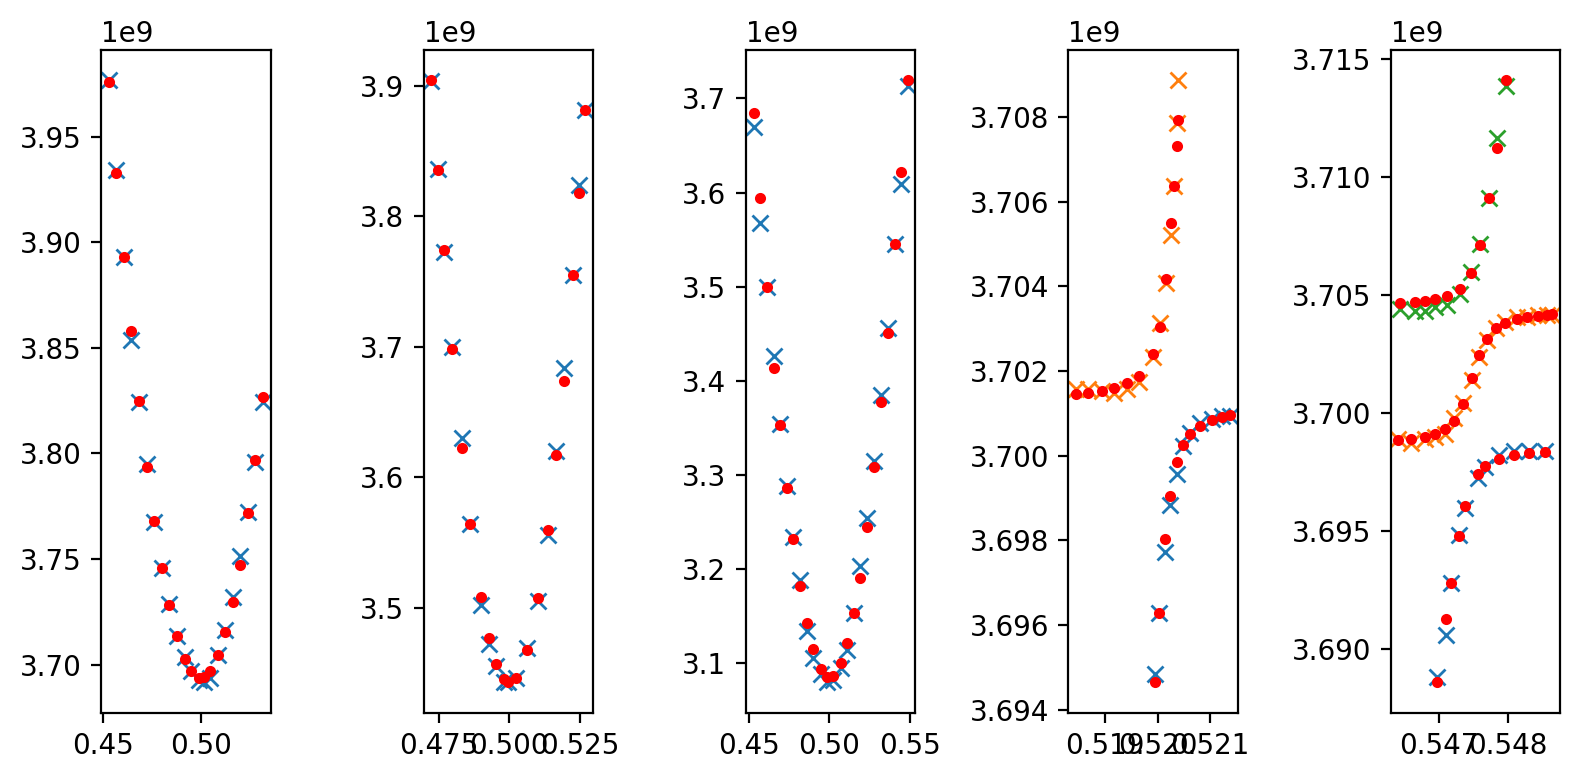

In [696]:
φ_ext_and_ω_list, ω_exp_list = fits.return_spectra_multiple_models(models)
fig, axs = plt.subplots(ncols=len(φ_ext_and_ω_list), figsize=[8,4], dpi=200)
for i, (ax, (φ_ext_opt, ω_opt), ω_exp) in enumerate(zip(axs, φ_ext_and_ω_list, ω_exp_list )):
    try:
        ax.plot(φ_ext_opt, ω_exp, 'x')
        ax.plot(φ_ext_opt, ω_opt, '.r')
    except:
        for φ_ext_opt_i, ω_exp_i, ω_opt_i in zip(φ_ext_opt, ω_exp, ω_opt):
            ax.plot(φ_ext_opt_i, ω_exp_i, 'x')
            ax.plot(φ_ext_opt_i, ω_opt_i, '.r')
    
# axs[1].set_ylim([6.26e9,6.29e9])
fig.tight_layout()

# Estimate circuit capacitances from fits

In [314]:
CF_1, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int_11, CR_1, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']
CF_2, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, _, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_2' + '.npz')['parameters_opt']
CF_3, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
C_int_33, CR_3, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_3' + '.npz')['parameters_opt']
C_int_12, _, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2' + '.npz')['parameters_opt']
C_int_12, C_int_23, C_int_13 = np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2_qubit_3' + '.npz')['parameters_opt'] 

In [315]:
C_inv = np.array([[CF_1**-1     ,C_int_11**-1   ,C_int_12**-1   ,C_int_12**-1   ,C_int_13**-1   ,C_int_13**-1   ],
                  [C_int_11**-1 ,CR_1**-1       ,C_int_12**-1   ,C_int_12**-1   ,C_int_13**-1   ,C_int_13**-1   ],
                  [C_int_12**-1 ,C_int_12**-1   ,CF_2**-1       ,0              ,C_int_23**-1   ,C_int_23**-1   ],
                  [C_int_12**-1 ,C_int_12**-1   ,0              ,CR_2**-1       ,C_int_23**-1   ,C_int_23**-1   ],
                  [C_int_13**-1 ,C_int_13**-1   ,C_int_23**-1   ,C_int_23**-1   ,CF_3**-1       ,C_int_33**-1   ],
                  [C_int_13**-1 ,C_int_13**-1   ,C_int_23**-1   ,C_int_23**-1   ,C_int_33**-1   ,CR_3**-1       ]])

In [316]:
C_mat = np.linalg.inv(C_inv)

In [317]:
matrix = C_mat
max_len = 0
for row in matrix:
    for num in row:
        num_str = f"{num:.4g}"  # Using 4 significant digits for this example
        if len(num_str) > max_len:
            max_len = len(num_str)

# Print the matrix with the numbers properly aligned
for row in matrix:
    for num in row:
        print(f"{num:>{max_len}.4g}", end=' ')
    print()  # New line at the end of each row

     25.48    -0.3456   -0.03711   -0.01053  -0.003201  -0.001345 
   -0.3456      7.486   -0.01054  -0.002991 -0.0009095  -0.000382 
  -0.03711   -0.01054      22.45  5.182e-05   -0.04555   -0.01913 
  -0.01053  -0.002991  5.182e-05      6.368   -0.01292  -0.005428 
 -0.003201 -0.0009095   -0.04555   -0.01292      26.47    -0.2291 
 -0.001345  -0.000382   -0.01913  -0.005428    -0.2291      11.25 


In [318]:
CF_1_single, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1_single, _, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']
CF_1_single, CR_1_single

(24.377436446888616, 7.212070212090448)

In [319]:
CF_1 - CF_1_single

1.0845230695724553

In [320]:
CR_1 - CR_1_single

0.26898176592132916

In [321]:
C_12 = -C_mat[0,2]*4
C_12

0.14842961677055738

In [322]:
C_23 = -C_mat[2,4]*4
C_23

0.1822087337868481

In [323]:
import sympy as sym

In [324]:
C_F_1, C_F_2, C_F_3, C_R_1, C_R_2, C_R_3, C_C = sym.symbols('C_F_1, C_F_2, C_F_3, C_R_1, C_R_2, C_R_3, C_C', real=True, positive=True, nonzero=True)

In [325]:
C_mat_sym = sym.Matrix([[C_F_1 + C_C/4  ,-C_C / 4       ,-C_C / 4       ,-C_C / 4       , 0             , 0             ],
                        [-C_C / 4       , C_R_1 + C_C/4 ,-C_C / 4       ,-C_C / 4       , 0             ,0              ],
                        [-C_C / 4       ,-C_C / 4       , C_F_2 + C_C/2 , 0             ,-C_C / 4       ,-C_C / 4       ],
                        [-C_C / 4       ,-C_C / 4       , 0             , C_R_2 + C_C/2 ,-C_C / 4       ,-C_C / 4       ],
                        [0              ,0              ,-C_C / 4       ,-C_C / 4       ,C_F_3 + C_C/4  ,-C_C / 4       ],
                        [0              ,0              ,-C_C / 4       ,-C_C / 4       ,-C_C / 4       ,C_R_3 + C_C/4  ]])

In [326]:
C_inv_sym = C_mat ** -1
sym.simplify(C_inv_sym)

[[0.0392495574423254, -2.89372193753105, -26.9487996198441, -94.987175450752, -312.36859600154, -743.756432965905], [-2.89372193753105, 0.133587215107005, -94.8560687755659, -334.341795347299, -1099.49450230171, -2617.92036576402], [-26.9487996198441, -94.8560687755659, 0.0445525599742132, 19297.7301280333, -21.9528445034874, -52.270201071328], [-94.987175450752, -334.341795347299, 19297.7301280333, 0.157036549234873, -77.3777950005736, -184.238215803582], [-312.36859600154, -1099.49450230171, -21.9528445034874, -77.3777950005736, 0.0377722377135085, -4.36584255512601], [-743.756432965905, -2617.92036576402, -52.270201071328, -184.238215803582, -4.36584255512601, 0.0888746226309023]]

In [326]:
def hamiltonian_qubit_C_qubit_C_qubit(coupling_capacitances, params_1='load', params_2='load', params_3='load', nmax_r=5, nmax_f=10):
    '''
    params_1, params_2 and params_3 can be either the string 'load', in which case the corresponding parameters for each circuit are loaded from those of the fits,
    or a list of parameters
    '''
    if params_1 == 'load':
        CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
        C_int_11, CR_1, LR_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']
    

# Full spectrum

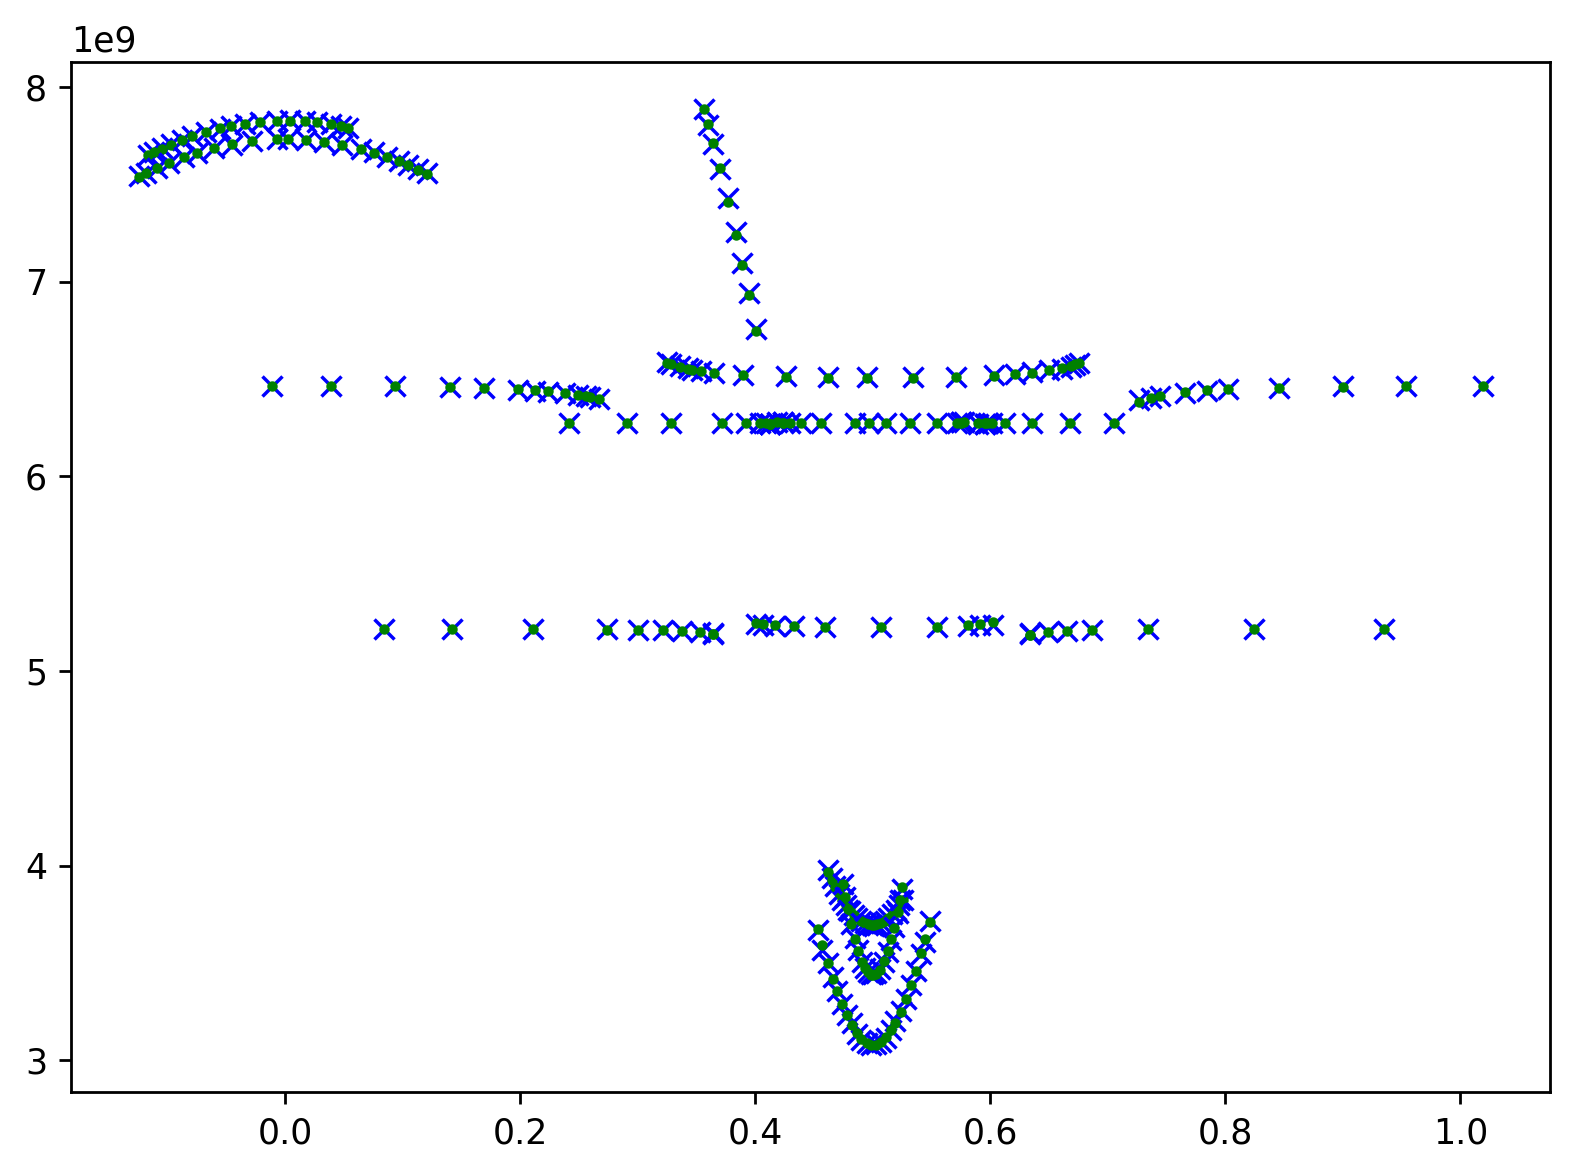

In [330]:
experiment_names = ['qubit_1', 'resonator_1', 'qubit_2', 'resonator_2', 'qubit_3', 'resonator_3']

fig, ax = plt.subplots(dpi=250)

for experiment_name in experiment_names:
    _, ω_exp, _, _, _ = fits.get_experimental_spectrum(experiment_name)
    theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)
    parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
    parameters_opt = np.load(parameters_path)['parameters_opt'] 
    data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
        
    φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
    ax.plot(φ_ext_opt, ω_exp, 'xb')
    ax.plot(φ_ext_opt, ω_opt, '.g', markersize=4)
   
fig.tight_layout()

In [ ]:
    elif experiment_name == 'qubit_1_qubit_2':
        def qubit_qubit_crossing_spectrum(parameters, data_set, out='error'):
            C_int, φ_ext_i, φ_ext_f, LF_1 = parameters
            CF_1, EJ_1, CF_2, LF_2, EJ_2, I_exp, ω_exp, indices_0, indices_1, nmax_f = data_set

            qubit_1 = sq_ext.sq_fluxonium(C_F_eff=CF_1, L_F_eff=LF_1, EJ=EJ_1, nmax_f=nmax_f)
            H_1 = qubit_1.hamiltonian()
            Q_1 = qubit_1.charge_op(0)
            I = qt.identity(H_1.shape[0])

            qubit_2 = sq_ext.sq_fluxonium(C_F_eff=CF_2, L_F_eff=LF_2, EJ=EJ_2, nmax_f=nmax_f)
            loop = qubit_2.loops[0]

            I_unitary = (I_exp - I_exp.min()) / (I_exp.max() - I_exp.min())
            Δ_φ_ext = φ_ext_f - φ_ext_i
            φ_ext_values = I_unitary * Δ_φ_ext + φ_ext_i
            ω_vs_φ_ext = np.zeros([len(φ_ext_values), 2])

            for i, φ_ext in enumerate(φ_ext_values):
                loop.set_flux(φ_ext)
                H_2 = qubit_2.hamiltonian()
                Q_2 = qubit_2.charge_op(0)
                H = qt.tensor(H_1, I) + qt.tensor(I, H_2) + C_int ** -1 * fF ** -1 * qt.tensor(Q_1, Q_2)
                ω_vs_φ_ext[i] = sq_ext.diag(H, 3, remove_ground=True)[0][1:]

            if out == 'error':
                sort_indices = np.argsort(φ_ext_values)
                ω_vs_φ_ext_sorted = ω_vs_φ_ext[sort_indices]
                ω_exp_sorted = ω_exp[sort_indices]
                error_0 = np.sum(np.abs(ω_exp_sorted[indices_0] - ω_vs_φ_ext_sorted[indices_0, 0]))
                error_1 = np.sum(np.abs(ω_exp_sorted[indices_1] - ω_vs_φ_ext_sorted[indices_1, 1]))
                error = error_0 + error_1
                print(error)
                return error

            elif out == 'spectrum':
                return φ_ext_values, ω_vs_φ_ext * 1e9
        return qubit_qubit_crossing_spectrum